<div  style="border-radius: 10px; border: 2px solid #f2f0e9; padding: 20px; background-color: #3d3b35; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #fce8ae; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">🧑‍🌾 Multiple Regression Analysis</h1>
</div>

<div style="border-radius: 10px; border: 2px solid #f2f0e9; padding: 20px; background-color:#fcf6de; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
   <div style="display: flex; align-items: flex-start;">
      <div style="flex: 1;">
         <h1 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-weight: bold;"> Objective</h1>
         <div style="margin-top: 20px; text-align: left;">
            <ul style="list-style-type: decimal; margin-left: 20px; font-size: 18px; color: #333;">
            <li>Data Checks to Perform &#128269;</li>
            <li>Exploratory Data Analysis &#128220;</li>
            <li>Data Pre-Processing &#128295;</li>
            <li>Model Training &#127891;</li>
            <li>Choosing the Best Model &#128640;</li>
        </ul>
         </div>
      </div>
      <div style="margin-left: 20px;">
         <img src="https://i.gifer.com/XOsX.gif" alt="Small Image" style="width: 100px; height: auto;">
      </div>
   </div>
</div>


##  1. Importing Libraries 📚

In [1]:
!pip install cmaes

In [2]:
!pip install wordcloud

👉 Including the libraries that will be utilized in this notebook.

In [3]:
import numpy as np
import pandas as pd 

#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from copy import deepcopy
from functools import partial
from itertools import combinations

##Scaling and statistical functions
import random
import re
from random import uniform
import gc
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_squared_log_error, mean_absolute_error, r2_score
from scipy import stats
import statsmodels.api as sm
import math
from scipy.stats import skew
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import category_encoders as ce


#Hyperparameter optimization
import optuna

#Modelling 
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import  KFold
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.ensemble import HistGradientBoostingRegressor,ExtraTreesRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoost, CatBoostRegressor,CatBoostClassifier
from catboost import Pool
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, Lars, LassoLars
from sklearn.linear_model import HuberRegressor, OrthogonalMatchingPursuit
from sklearn.dummy import DummyRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from tensorflow.keras import backend as K


#Suppress warnings 
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(



<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color:#fcf6de ; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #2c3e50 ;"> 2.</span>  Information About Data 📑 </h3>
   
</div>


In [4]:
train=pd.read_csv('/kaggle/input/datathon-2024/train.csv')
test=pd.read_csv('/kaggle/input/datathon-2024/test_x.csv')
submission=pd.read_csv('/kaggle/input/datathon-2024/sample_submission.csv')

**Head of data**

In [5]:
train.head(5)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,Finans Yönetimi ve Pazarlama,1,NaN,Hayır,Batem,NaN,Ankara,Meslek lisesi,Elektirk,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,İlkokul Mezunu,Evet,Özel Sektör,6,Evet,Tema,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,Bilgisayar Mühendisliği,3,3.00-2.50,Hayır,Cumhuriyet Fen Lisesi,NaN,Diyarbakır,Fen lisesi,Sayısal,NaN,3.50-3,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,10,Evet,Güzel Konuşma ve yazma kulübü,Hayır,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,Siyaset Bilimi ve Uluslararası ilişkiler,NaN,3.00-2.50,Hayır,Samanyolu Lisesi,NaN,Ankara,Özel lisesi,TM,NaN,3.00 - 4.00,Hayır,NaN,NaN,İlkokul Mezunu,Hayır,0,Üniversite,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


**Train and Test Shape**

In [6]:
train.shape,test.shape

((65125, 44), (11049, 43))

**Data Types**

In [7]:
train.dtypes

Basvuru Yili                                                   int64
Degerlendirme Puani                                          float64
Cinsiyet                                                      object
Dogum Tarihi                                                  object
Dogum Yeri                                                    object
Ikametgah Sehri                                               object
Universite Adi                                                object
Universite Turu                                               object
Burslu ise Burs Yuzdesi                                      float64
Burs Aliyor mu?                                               object
Bölüm                                                         object
Universite Kacinci Sinif                                      object
Universite Not Ortalamasi                                     object
Daha Once Baska Bir Universiteden Mezun Olmus                 object
Lise Adi                          

**Data Information**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

**Checking Null Values**

In [9]:
train.isnull().sum()

Basvuru Yili                                                     0
Degerlendirme Puani                                              1
Cinsiyet                                                       169
Dogum Tarihi                                                   177
Dogum Yeri                                                     791
Ikametgah Sehri                                               2037
Universite Adi                                                 132
Universite Turu                                                255
Burslu ise Burs Yuzdesi                                      42685
Burs Aliyor mu?                                                  0
Bölüm                                                          231
Universite Kacinci Sinif                                       374
Universite Not Ortalamasi                                     2753
Daha Once Baska Bir Universiteden Mezun Olmus                37345
Lise Adi                                                      

In [10]:
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = train.isnull().sum().sum()
total_cells = train.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET},\
which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 736133,which is 25.69% of total data.


In [11]:
#Let's check unique values in each Categorical column
from tabulate import tabulate
cat_columns = train.select_dtypes(include=['object'])

for column in cat_columns:
    print(f"Value counts for column '{column}':")
    value_counts = train[column].value_counts().head(10)
    total_count = len(train[column])
    data = []
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        data.append([value, count, f"{percentage:.2f}%"])
    headers = ["Value", "Count", "Percentage"]
    print(tabulate(data, headers=headers, tablefmt="pretty"))
    print('=' * 50)

Value counts for column 'Cinsiyet':
+-----------------------+-------+------------+
|         Value         | Count | Percentage |
+-----------------------+-------+------------+
|         Kadın         | 32077 |   49.25%   |
|         Erkek         | 22752 |   34.94%   |
|         ERKEK         | 10012 |   15.37%   |
| Belirtmek istemiyorum |  115  |   0.18%    |
+-----------------------+-------+------------+
Value counts for column 'Dogum Tarihi':
+-----------------+-------+------------+
|      Value      | Count | Percentage |
+-----------------+-------+------------+
|   1/1/70 2:00   | 1655  |   2.54%    |
|   1/1/00 0:00   |  179  |   0.27%    |
|   1/1/01 0:00   |  154  |   0.24%    |
|    1/1/1997     |  139  |   0.21%    |
|    1/1/1998     |  129  |   0.20%    |
|    1/1/1996     |  119  |   0.18%    |
|   1/1/99 0:00   |  117  |   0.18%    |
|    1/1/1995     |  106  |   0.16%    |
|    1/1/1999     |  84   |   0.13%    |
| 1.01.2001 00:00 |  82   |   0.13%    |
+--------------

In [12]:
# Lets check count & % of missing values in the dataset
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite has 64706 missing values, which is 99.36% of the column.
Lise Bolum Diger has 63599 missing values, which is 97.66% of the column.
Lise Adi Diger has 60392 missing values, which is 92.73% of the column.
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz? has 50526 missing values, which is 77.58% of the column.
Hangi STK'nin Uyesisiniz? has 49518 missing values, which is 76.04% of the column.
Uye Oldugunuz Kulubun Ismi has 48691 missing values, which is 74.77% of the column.
Baska Kurumdan Aldigi Burs Miktari has 44162 missing values, which is 67.81% of the column.
Burs Aldigi Baska Kurum has 43977 missing values, which is 67.53% of the column.
Burslu ise Burs Yuzdesi has 42685 missing values, which is 65.54% of the column.
Daha Once Baska Bir Universiteden Mezun Olmus has 37345 missing values, which is 57.34% of the column.
Ingilizce Seviyeniz? has 36533 missing values, which is 56.10% of the column.
Anne Sektor has 34537 miss

**Checking Duplicated Values**

In [13]:
train.duplicated().sum()

0

**Statistical Result**

In [14]:
train.select_dtypes(include=np.number).describe()

,Basvuru Yili,Degerlendirme Puani,Burslu ise Burs Yuzdesi,id
count,65125.000000,65124.000000,22440.000000,65125.000000
mean,2018.277298,32.086466,34.226181,32562.000000
std,2.669979,18.139239,41.632412,18800.112478
min,2014.000000,0.000000,0.000000,0.000000
25%,2016.000000,18.000000,0.000000,16281.000000
50%,2019.000000,29.000000,0.000000,32562.000000
75%,2021.000000,44.000000,75.000000,48843.000000
max,2022.000000,102.000000,100.000000,65124.000000



<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color:#fcf6de ; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #2c3e50 ;"> 2.</span>  Exploratory Data Analysis 🏕 </h3>
   
</div>


👉 Within this segment, we aim to explore the data and visually uncover potential patterns or insights. Prior to commencing the visualization, we will segregate the categorical and numerical data to enhance efficiency in our analysis.

In [15]:
continous_features=['Basvuru Yili', 'Degerlendirme Puani', 'Burslu ise Burs Yuzdesi']
categorical_features= ['Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri', 'Ikametgah Sehri',
       'Universite Adi', 'Universite Turu', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi',
       'Daha Once Baska Bir Universiteden Mezun Olmus', 'Lise Adi',
       'Lise Adi Diger', 'Lise Sehir', 'Lise Turu', 'Lise Bolumu',
       'Lise Bolum Diger', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Burs Aldigi Baska Kurum',
       'Baska Kurumdan Aldigi Burs Miktari', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Anne Sektor', 'Baba Egitim Durumu',
       'Baba Calisma Durumu', 'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Uye Oldugunuz Kulubun Ismi',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       "Hangi STK'nin Uyesisiniz?", 'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
       'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
       'Ingilizce Biliyor musunuz?', 'Ingilizce Seviyeniz?',
       'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite']

We'll initiate the process with numerical data, followed by categorical data. Subsequently, we will proceed with visualization encompassing both categorical and numerical data.

## 3.1 Numerical Variable 🔢

### 3.1.1 Distribution of Application Year

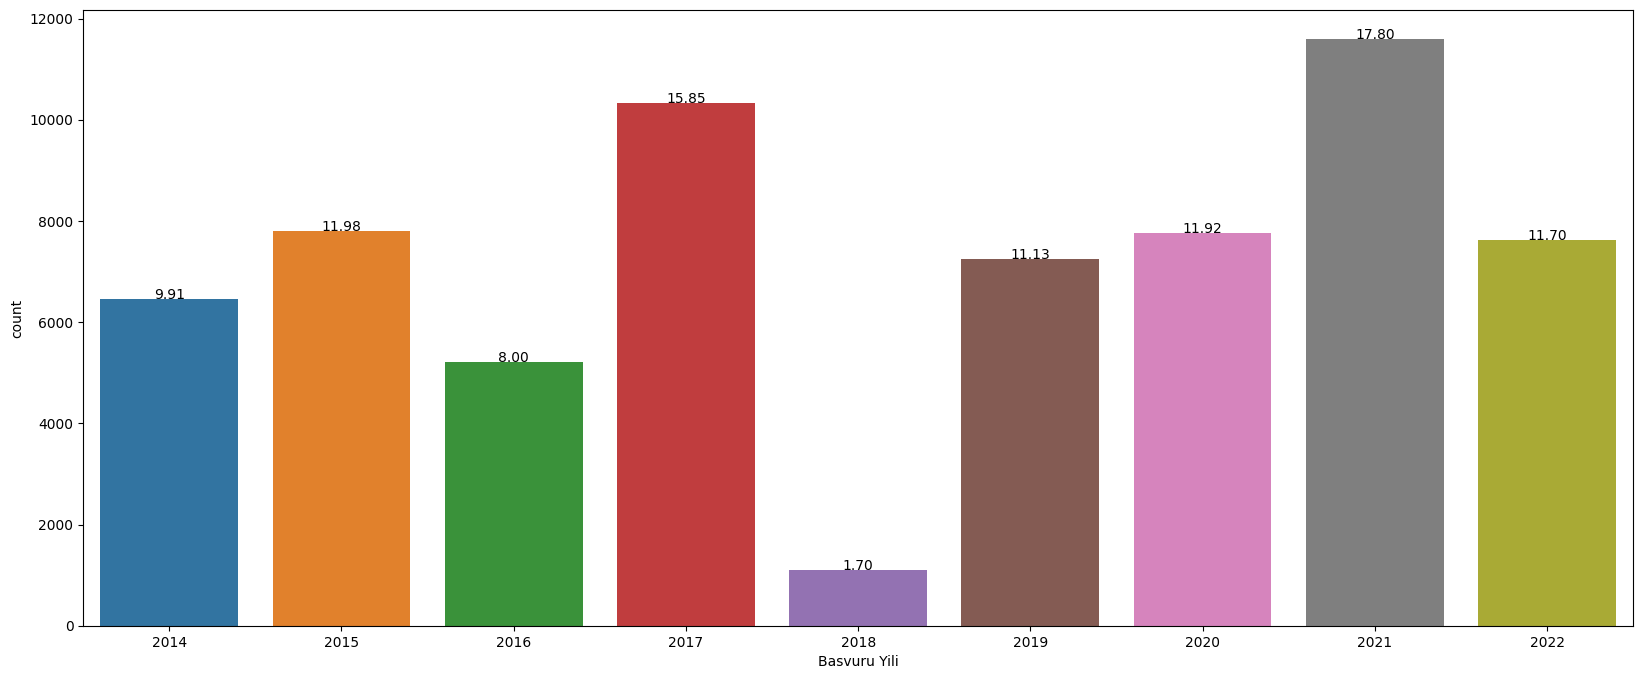

In [16]:
plt.figure(figsize=(20,8))
total = float(len(train["Basvuru Yili"]) )

ax = sns.countplot(x="Basvuru Yili", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

👉 The number of people who applied to university is the most in 2021

### 3.1.2 Distribution of Evaluation Score (Target)

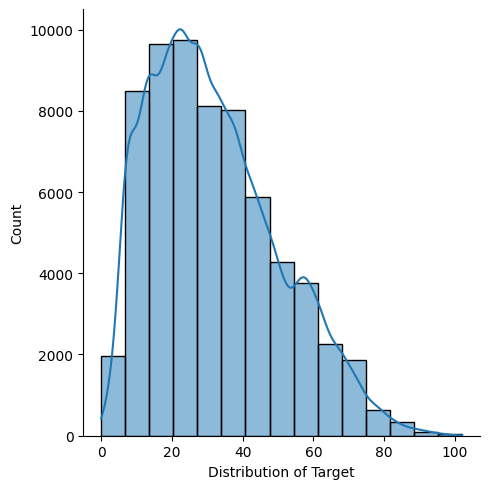

In [17]:
g = sns.displot(x='Degerlendirme Puani', data=train, kde=True, bins=15)
g.set_axis_labels("Distribution of Target", "Count")

In [18]:
train['Degerlendirme Puani'].skew()

0.630144203787461

Skewness is a statistical measure that quantifies the asymmetry of the probability distribution of a real-valued random variable. In this concept :

* If train['Degerlendirme Puani'].skew() is approximately 0, it suggests that the distribution of 'Degerlendirme Puani' is symmetric.

* If the skewness is greater than 0, it indicates a right-skewed (positively skewed) distribution, meaning that the tail on the right side is longer or fatter than the left side.

* If the skewness is less than 0, it indicates a left-skewed (negatively skewed) distribution, meaning that the tail on the left side is longer or fatter than the right side

In our graphic, Degerlendirme Puani is right-skewed.

#### 3.1.2.1 Relationship between Target and Application Year

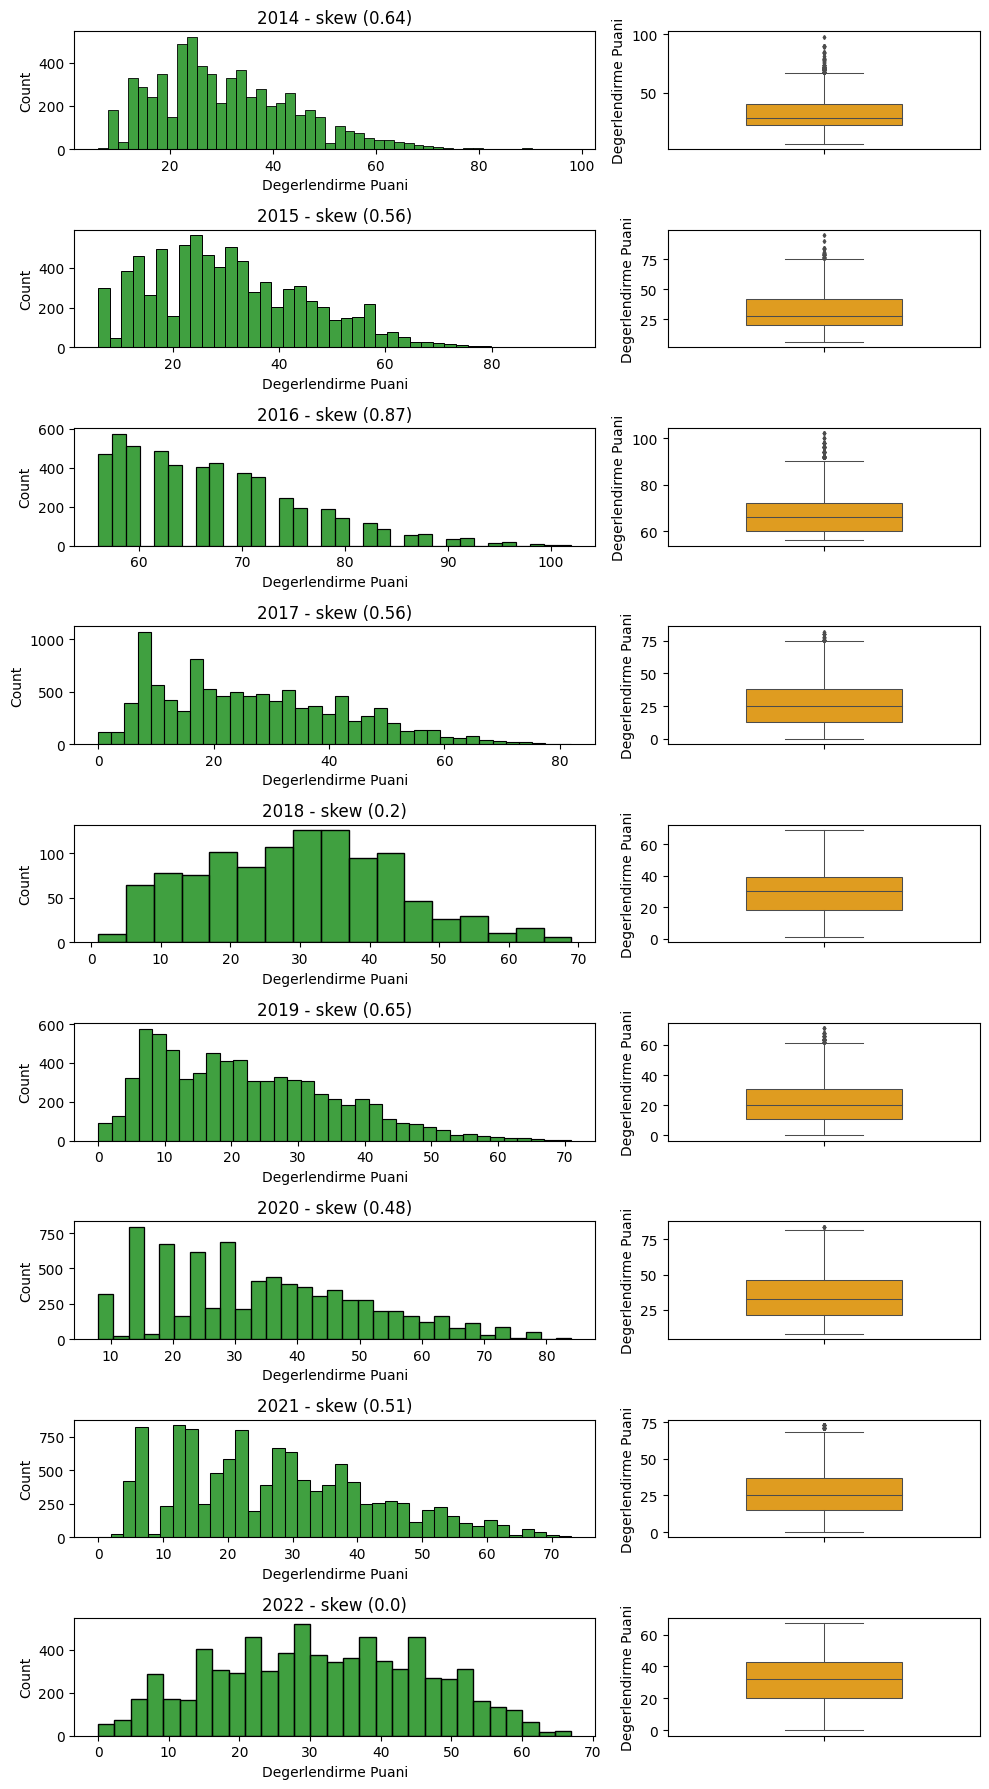

In [19]:
fig, axes = plt.subplots(9,2, figsize=(10,9*2), gridspec_kw={'width_ratios':[ 0.50, 0.30 ]})

for i,(ind, c) in enumerate(train.groupby('Basvuru Yili')):   
   # ax = axes[i,0]

    
    ax = axes[i,0]
    sns.histplot(data=c,x='Degerlendirme Puani',ax=ax,color='green')               
    ax.set_title(f"{ind} - skew ({c['Degerlendirme Puani'].skew().round(2)})")

    ax = axes[i,1]
    sns.boxplot(data=c,y='Degerlendirme Puani',ax=ax,color='orange', linewidth=.75, fliersize=2.01, width=0.50)               
    
plt.tight_layout()

#### 3.1.2.2 Highest Evaluation Score by Year

   Basvuru Yili  Degerlendirme Puani
0          2014                 98.0
1          2015                 95.0
2          2016                102.0
3          2017                 82.0
4          2018                 69.0
5          2019                 71.0
6          2020                 84.0
7          2021                 73.0
8          2022                 67.0


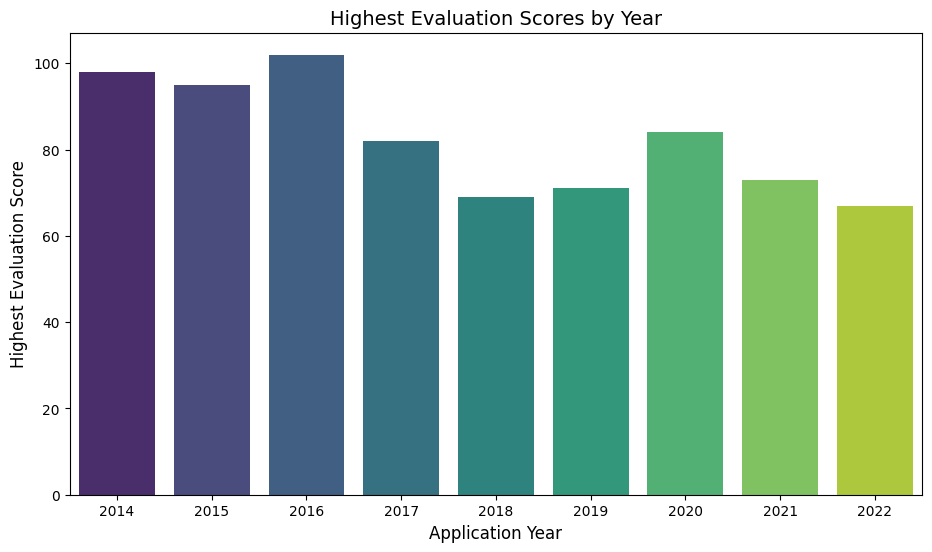

In [20]:
# Her yıl için en yüksek değerlendirme puanını bulma
max_scores_by_year = train.groupby('Basvuru Yili')['Degerlendirme Puani'].max().reset_index()

# DataFrame'e göz atma
print(max_scores_by_year)

# Bar plot ile görselleştirme
_, ax = plt.subplots(figsize=(11, 6))

sns.barplot(data=max_scores_by_year, 
            x='Basvuru Yili', 
            y='Degerlendirme Puani', 
            palette='viridis', 
            ax=ax)

# Grafiğe başlık ve eksen etiketleri ekleme
ax.set_title('Highest Evaluation Scores by Year', fontsize=14)
ax.set_xlabel('Application Year', fontsize=12)
ax.set_ylabel('Highest Evaluation Score', fontsize=12)

plt.show()


👉 The highest evaluation score is 102.0 in 2016

#### 3.1.2.3. Distribution of Evaluation Score by Year

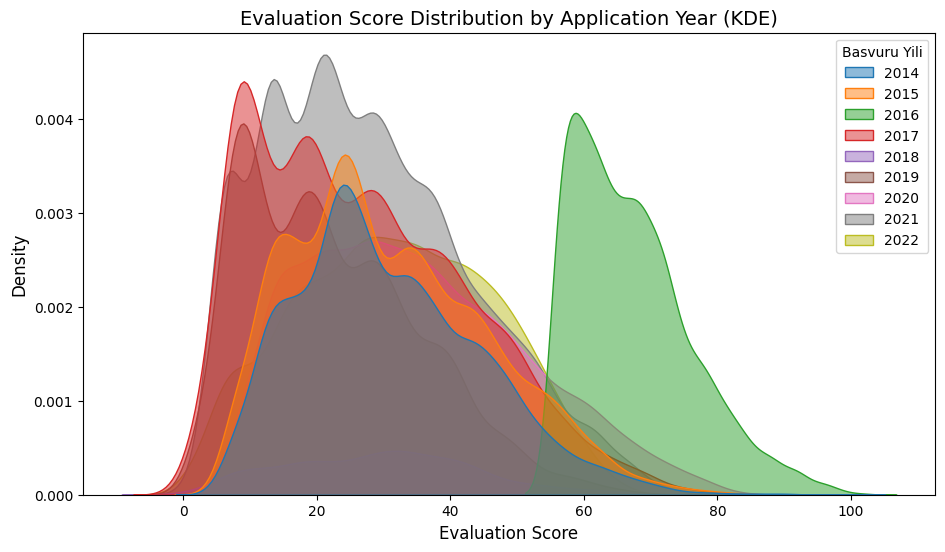

In [21]:
# KDE Plot: Başvuru yılına göre değerlendirme puanı dağılımı
_, ax = plt.subplots(figsize=(11, 6))

# Seaborn KDE plot (Yoğunluk Grafiği) ile renkli ve şeffaf
sns.kdeplot(data=train, 
            x='Degerlendirme Puani', 
            hue='Basvuru Yili',  # Başvuru yılına göre renklendirme
            palette='tab10',     # Renk paleti
            shade=True,          # Yoğunluk eğrisinin altını renklendirme
            alpha=0.5,           # Renklerin şeffaflığı
            ax=ax)

# Başlık ve eksen etiketleri
ax.set_title('Evaluation Score Distribution by Application Year (KDE)', fontsize=14)
ax.set_xlabel('Evaluation Score', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Grafiği gösterme
plt.show()


👉 We can see clearly that the evaluation score in 2016 has the highest score compared to other years.

#### 3.1.2.4 Near Approach 2016 

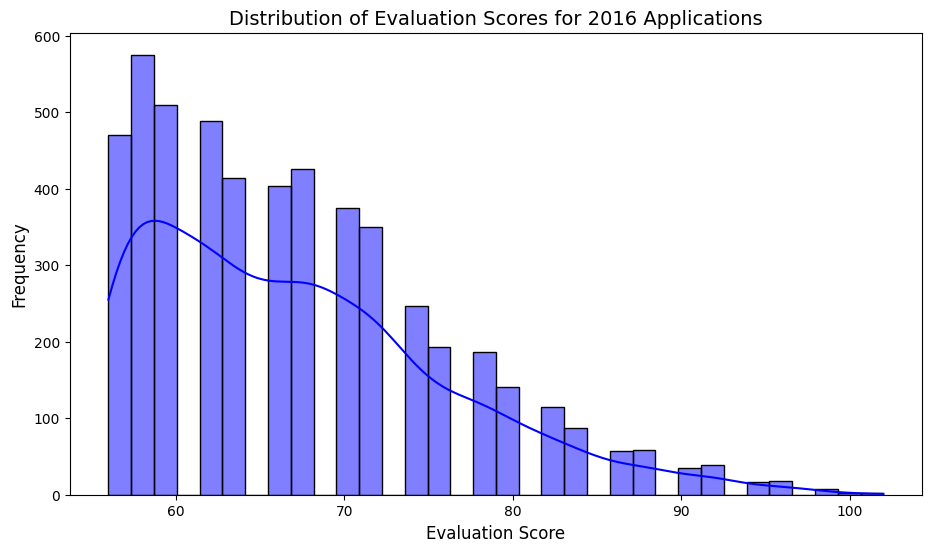

In [22]:
# 2016 yılına ait veriyi filtreleme
data_2016 = train[train['Basvuru Yili'] == 2016]

# Yeni bir figür oluşturma
_, ax = plt.subplots(figsize=(11, 6))

# KDE plot (yoğunluk grafiği) ile değerlendirme puanı dağılımı
sns.histplot(data=data_2016, 
             x='Degerlendirme Puani', 
             kde=True,  # KDE (Yoğunluk Eğrisi) eklemek için
             color='blue', 
             ax=ax)

# Başlık ve eksen etiketleri
ax.set_title('Distribution of Evaluation Scores for 2016 Applications', fontsize=14)
ax.set_xlabel('Evaluation Score', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Grafiği gösterme
plt.show()


#### 3.1.2.5 Outlier Analysis for Target

In [23]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers(train['Degerlendirme Puani'])

print('The number of outliers: '+ str(len(outliers)))

print('Max outlier value: '+ str(outliers.max()))

print('Min outlier value: ' + str(outliers.min()))

The number of outliers: 338
Max outlier value: 102.0
Min outlier value: 84.0


In [24]:
data=train['Degerlendirme Puani'].fillna(0)
data=sorted(data)
data_mean, data_std = np.mean(data), np.std(data)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print('Cut Off =', round(cut_off,3))
print('Lower =', round(lower,3))
print('Upper =', round(upper,3))

Cut Off = 54.418
Lower = -22.332
Upper = 86.504


* **Cut Off** = 54.418: This is the threshold for detecting outliers using the Z-score method (3 times the standard deviation).
* **Lower** = -22.332: The lower bound for the Z-score method. Any value below this is considered an outlier.
* **Upper** = 86.504: The upper bound for the Z-score method. Any value above this is considered an outlier.
  
* **The number of outliers**: 338: There are 338 outliers detected using the IQR method.
* **Max outlier value**: 102.0: The maximum outlier value found.
* **Min outlier value**: 84.0: The minimum outlier value found.

<Axes: ylabel='Degerlendirme Puani'>

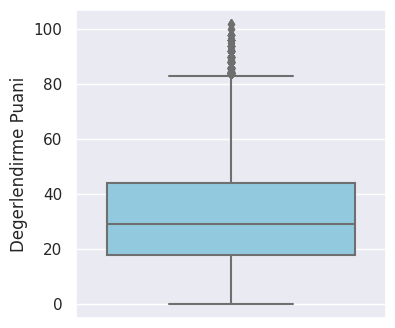

In [25]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(1, 1, figsize=(4, 4))

sns.boxplot(data=train, y="Degerlendirme Puani", color='skyblue')

👉 It's clear that 'Degerlendirme Puani' has a number of outliers

After determining the upper and lower bounds, we will apply to data.

In [26]:
train = train[train['Degerlendirme Puani'] < upper]
train= train[train['Degerlendirme Puani'] > lower]
print('The shape of our dataframe after the Outlier Removal is', train.shape)

The shape of our dataframe after the Outlier Removal is (64939, 44)


* The outlier removal process reduced the dataset from 65125 to 64939 rows.
    
* All remaining data points have 'Degerlendirme Puani' values that fall within the range defined by the ±3 standard deviations rule.

### 3.1.3 Scholarship Percentage 

<Axes: xlabel='Burslu ise Burs Yuzdesi', ylabel='Count'>

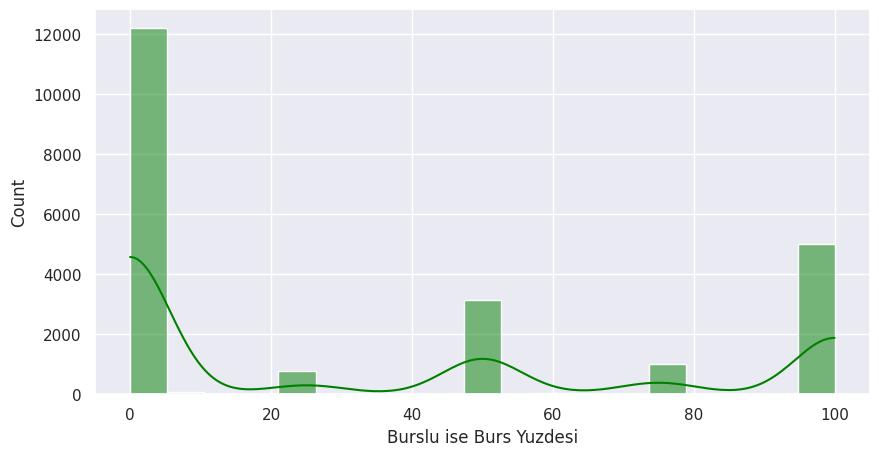

In [27]:
plt.figure(figsize=(10,5))

sns.histplot(data=train, x='Burslu ise Burs Yuzdesi', kde=True, color='green')

In [28]:
# Calculate the number of people with no scholarship (Burs Yuzdesi == 0)
no_scholarship_count = train[train['Burslu ise Burs Yuzdesi'] == 0].shape[0]

# Print the result
print(f'Number of people with no scholarship: {no_scholarship_count}')


Number of people with no scholarship: 12170


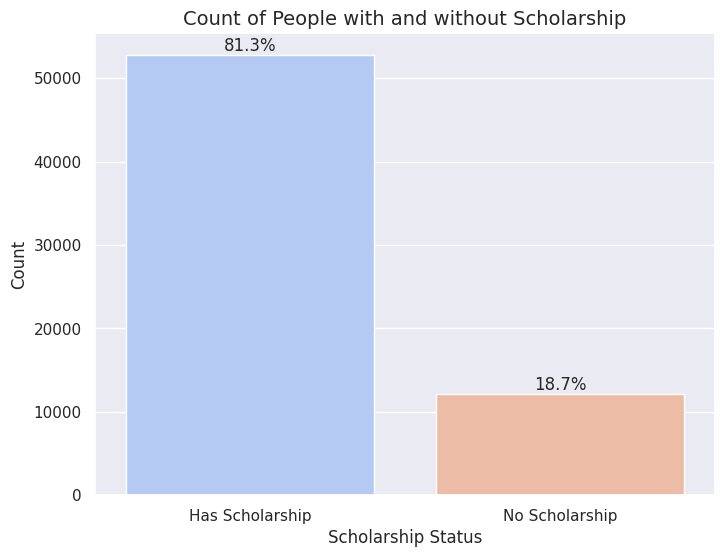

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that categorizes people based on scholarship status
train['Scholarship Status'] = train['Burslu ise Burs Yuzdesi'].apply(lambda x: 'No Scholarship' if x == 0 else 'Has Scholarship')
test['Scholarship Status'] = test['Burslu ise Burs Yuzdesi'].apply(lambda x: 'No Scholarship' if x == 0 else 'Has Scholarship')

# Plot the count of people with and without a scholarship
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Scholarship Status', data=train, palette='coolwarm')

# Add labels and title
plt.title('Count of People with and without Scholarship', fontsize=14)
plt.xlabel('Scholarship Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Calculate percentages and annotate on the bars
total = len(train)  # Total number of people in the dataset
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2  # Get the x position of the bar
    y = p.get_height()  # Get the height of the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


👉 As shown in the bar plot above, 81.3% of people do not have a scholarship

#### 3.1.3.1 Relationship Between Target and Scholarship Percentage

In [30]:
# Calculate the Pearson correlation coefficient between the two variables
correlation = train[['Degerlendirme Puani', 'Burslu ise Burs Yuzdesi']].corr()

# Print the correlation matrix
print(correlation)


                         Degerlendirme Puani  Burslu ise Burs Yuzdesi
Degerlendirme Puani                 1.000000                 0.179647
Burslu ise Burs Yuzdesi             0.179647                 1.000000


* Diagonal Values (1.000000):

Degerlendirme Puani to Degerlendirme Puani: The correlation of any variable with itself is always 1. Therefore, the value of 1.000000 on the diagonal represents the perfect correlation between Degerlendirme Puani and itself.
Burslu ise Burs Yuzdesi to Burslu ise Burs Yuzdesi: Similarly, the correlation of the scholarship percentage with itself is also 1.000000.
Off-Diagonal Value (0.179647):

* Degerlendirme Puani to Burslu ise Burs Yuzdesi (0.179647):

This value represents the Pearson correlation coefficient between the evaluation score and the scholarship percentage. The value 0.185515 indicates a positive but weak correlation.
Positive Correlation (0.179647): This means that, in general, as the evaluation score (Degerlendirme Puani) increases, the scholarship percentage (Burslu ise Burs Yuzdesi) also tends to increase slightly, but the relationship is not strong.

* Weak Correlation: The value is close to 0, which suggests that the relationship between these two variables is not very strong. In practical terms, this means that changes in the evaluation score are not strongly associated with changes in the scholarship percentage.

## 3.2 Categorical Variable 📊

### 3.2.1 Gender

In [31]:
train['Cinsiyet'] = train['Cinsiyet'].replace('ERKEK', 'Erkek')

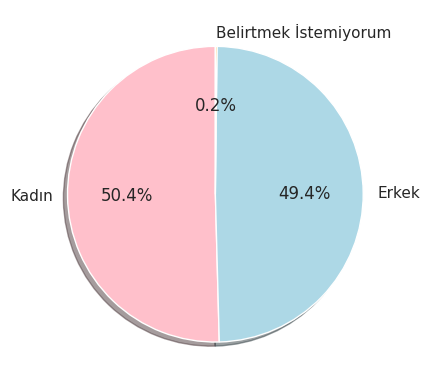

In [32]:
labels_pie = ["Kadın","Erkek",'Belirtmek İstemiyorum']
values = train['Cinsiyet'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'lightblue','orange']
ax1.pie(values, labels=labels_pie, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

👉 The number of men and women is roughly equal. The 0.2 ratio indicates a reluctance to specify gender.

### 3.2.2 Date of Birth

👉 We will calculate the age of individuals to gain a clearer understanding of the data.

In [33]:
current_year = datetime.now().year
train['Dogum Tarihi'] = pd.to_datetime(train['Dogum Tarihi'], dayfirst=True, errors='coerce')
test['Dogum Tarihi'] = pd.to_datetime(test['Dogum Tarihi'], dayfirst=True, errors='coerce')

train['Age'] = current_year - train['Dogum Tarihi'].dt.year
test['Age'] = current_year - test['Dogum Tarihi'].dt.year

In [34]:
print('Maximum number of age is:', train['Age'].max())
print('Minimum number of age is:', train['Age'].min())

Maximum number of age is: 136.0
Minimum number of age is: 7.0


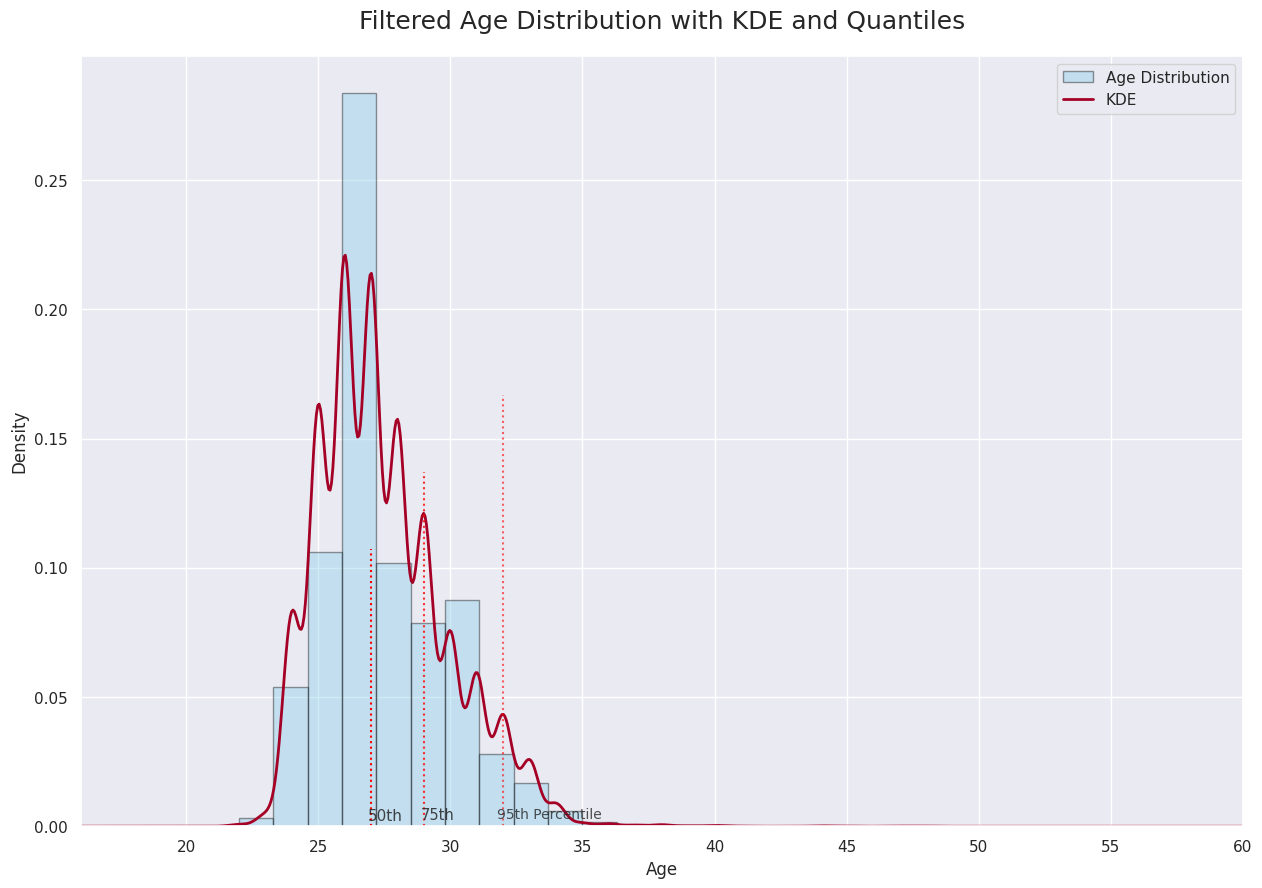

In [35]:
# Filter the age column for reasonable values (e.g., between 16 and 100)
filtered_train = train[(train['Age'] >= 18) & (train['Age'] <= 50)]

# Plot histogram and KDE
plt.figure(figsize=(15,10))
filtered_train['Age'].plot(kind="hist", density=True, alpha=0.4, bins=20, color="skyblue", edgecolor="black", label='Age Distribution')  # Increase bins for better granularity
filtered_train['Age'].plot(kind="kde", colormap='RdYlBu', linewidth=2, label='KDE')

# Calculate quantiles
quant_50, quant_75, quant_95 = filtered_train['Age'].quantile(0.5), filtered_train['Age'].quantile(0.75), filtered_train['Age'].quantile(0.95)
quants = [[quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]

# Add quantile lines
for i in quants:
    plt.axvline(i[0], color='red', alpha=i[1], ymax=i[2], linestyle=":")

# X-axis and labels
plt.xlabel('Age', fontsize=12)
plt.xlim(16, 60)  # Focus on the filtered range

# Y-axis and labels
plt.ylabel("Density", fontsize=12)

# Add annotations for quantiles

# # Annotations
plt.text(quant_50-.13, .0021, "50th", size = 11, alpha = .85)
plt.text(quant_75-.13, .0026, "75th", size = 10.5, alpha = .85)
plt.text(quant_95-.25, .0032, "95th Percentile", size = 10, alpha =.8)

# Title
plt.title("Filtered Age Distribution with KDE and Quantiles", fontsize=18, pad=20)

# Show legend
plt.legend(loc='upper right')

# Show plot
plt.show()


👉 We can see clearly that 'Age' feature has some outliers. The data includes that minimum age is -42  and maximum age is 136. These results are not realistic. Therefore, we need to apply filter method for specific range.

In [36]:
# Median of data with age range 18-70
median_age = train[(train['Age'] >= 18) & (train['Age'] <= 70)]['Age'].median()

# fill the age 
train['Age'] = train['Age'].mask((train['Age'] < 18) | (train['Age'] > 70), median_age)

**Life Stage**

In [37]:
def life_stage(age):
    if age < 18:
        return 'Adolescent'
    elif 18 <= age < 22:
        return 'College Age'
    elif 22 <= age < 30:
        return 'Young Professional'
    elif 30 <= age < 45:
        return 'Mid-Career'
    elif 45 <= age < 60:
        return 'Experienced'
    else:
        return 'Senior'

train['Life_Stage'] = train['Age'].apply(life_stage)
test['Life_Stage'] = train['Age'].apply(life_stage)

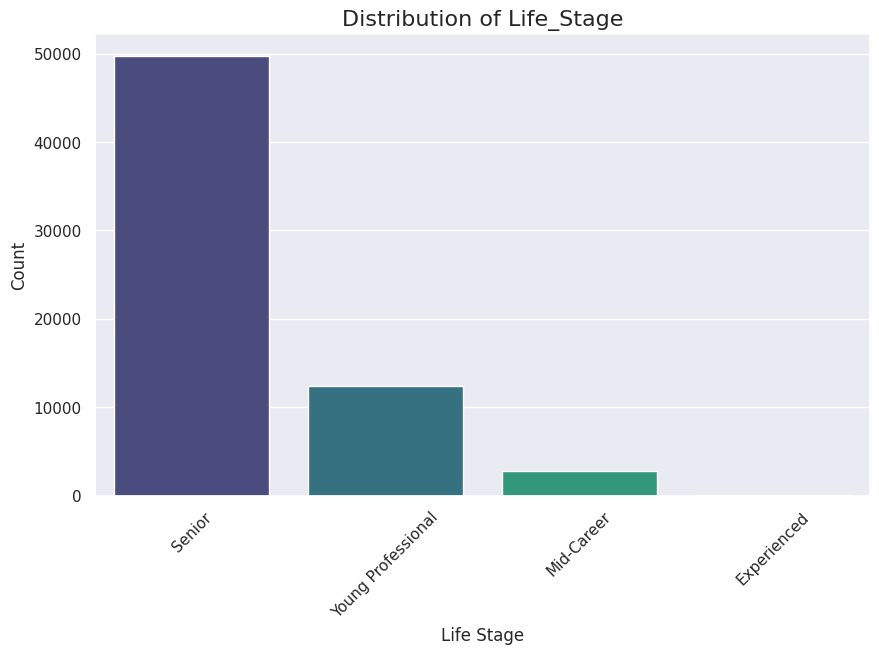

In [38]:
# Count the occurrences of each category in the Life_Stage column
life_stage_counts = train['Life_Stage'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=life_stage_counts.index, y=life_stage_counts.values, palette='viridis')

# Set the title and axis labels
plt.title('Distribution of Life_Stage', fontsize=16)
plt.xlabel('Life Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability

# Show the plot
plt.show()


👉 We can see that the largest age group among the participants is Senior (60 and above).

#### 3.2.2.1 Season, Zodiac 

In [39]:
# Extract year, month, and day from 'Dogum Tarihi'
train['Dogum Yili'] = train['Dogum Tarihi'].dt.year
test['Dogum Yili'] = test['Dogum Tarihi'].dt.year

train['Dogum Ayi'] = train['Dogum Tarihi'].dt.month
test['Dogum Ayi'] = test['Dogum Tarihi'].dt.month

train['Dogum Gunu'] = train['Dogum Tarihi'].dt.day
test['Dogum Gunu'] = test['Dogum Tarihi'].dt.day

# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

# Apply the get_season function to determine the season of birth
train['Dogum Mevsimi'] = train['Dogum Ayi'].apply(get_season)
test['Dogum Mevsimi'] = test['Dogum Ayi'].apply(get_season)


# Define a function to determine the zodiac sign based on the day and month
def get_zodiac_sign(day, month):
    if (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return 'Koç'
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return 'Boğa'
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return 'İkizler'
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return 'Yengeç'
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return 'Aslan'
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return 'Başak'
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return 'Terazi'
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return 'Akrep'
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return 'Yay'
    elif (month == 12 and day >= 22) or (month == 1 and day <= 19):
        return 'Oğlak'
    elif (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return 'Kova'
    elif (month == 2 and day >= 19) or (month == 3 and day <= 20):
        return 'Balık'
    else:
        return 'Bilinmiyor'

# Apply the get_zodiac_sign function to determine the zodiac sign of each person
train['Burç'] = train.apply(lambda row: get_zodiac_sign(row['Dogum Gunu'], row['Dogum Ayi']), axis=1)
test['Burç'] = test.apply(lambda row: get_zodiac_sign(row['Dogum Gunu'], row['Dogum Ayi']), axis=1)


Great, now we have just the month and date columns ready for determining the zodiac sign.

There are traditionally 12 zodiac signs, although some astrologers propose a 13th sign . For the sake of simplicity in this exercise, we'll go with the commonly accepted 12-sign setup.

Text(0, 0.5, 'count of zodiacs')

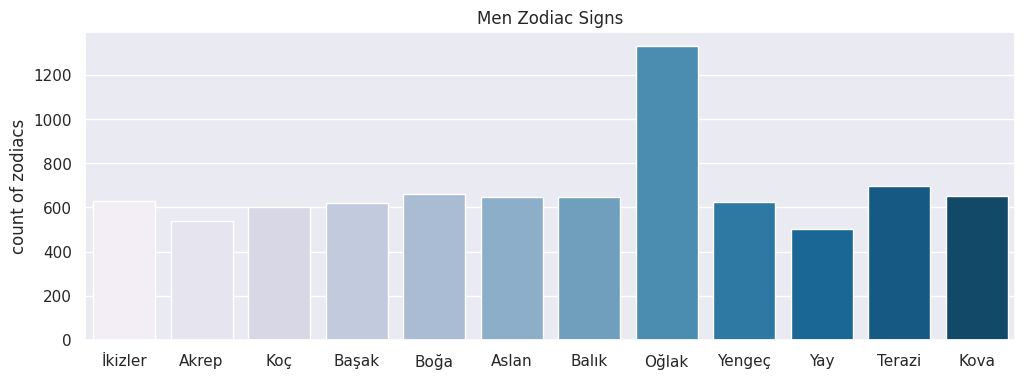

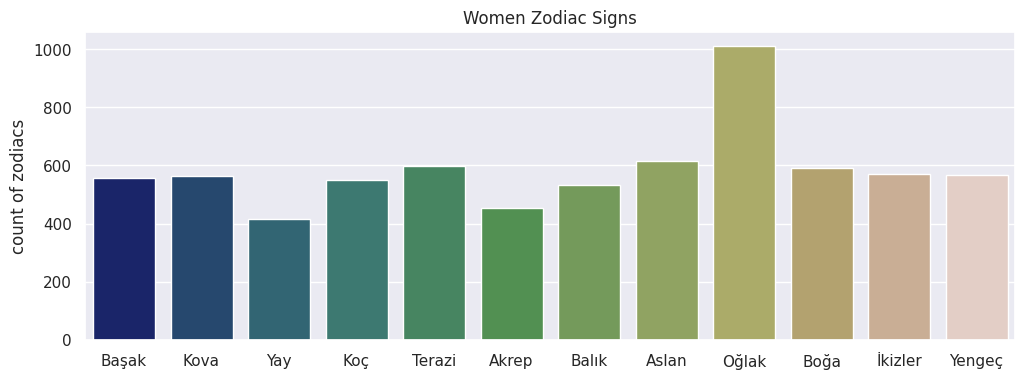

In [40]:
#plotting a chart for a number of men zodiac signs across the data
plt.figure(figsize=(12,4))
men_data=train[(train['Cinsiyet']=='Erkek') &(train['Burç']!='Bilinmiyor') ]
women_data=train[(train['Cinsiyet']=='Kadın')&(train['Burç']!='Bilinmiyor')]
plot = sns.countplot(x="Burç", data=men_data, palette="PuBu").set_title('Men Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

#making a one for women 
plt.figure(figsize=(12,4))
plot = sns.countplot(x="Burç", data=women_data, palette="gist_earth").set_title('Women Zodiac Signs')
plt.xlabel("")
plt.ylabel("count of zodiacs")

👉 Examining the data, we find that the majority of both men and women are born under the Capricorn sign.

Text(0, 0.5, 'count of season')

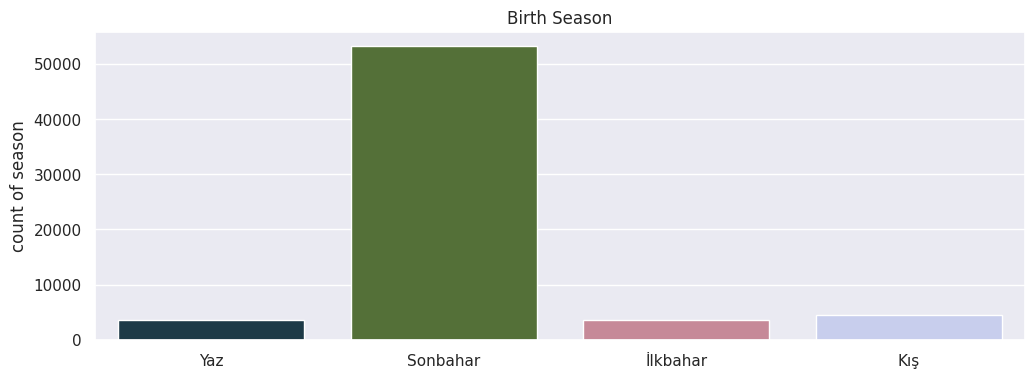

In [41]:
#plotting a chart for a number of men zodiac signs across the data
plt.figure(figsize=(12,4))

plot = sns.countplot(x="Dogum Mevsimi", data=train, palette="cubehelix").set_title('Birth Season')
plt.xlabel("")
plt.ylabel("count of season")


👉 The autumn season is observed as the most common birth season.

### 3.2.3 Place of Birth

👉 The data includes some provinces, so we need to convert these provinces into city names.

In [42]:
# Turkey city's map
cities = [
    "Adana", "Adıyaman", "Afyonkarahisar", "Ağrı", "Aksaray", "Amasya", "Ankara", "Antalya",
    "Ardahan", "Artvin", "Aydın", "Balıkesir", "Bartın", "Batman", "Bayburt", "Bilecik", "Bingöl",
    "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır",
    "Düzce", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane",
    "Hakkari", "Hatay", "Iğdır", "Isparta", "İstanbul", "İzmir", "Kahramanmaraş", "Karabük", "Karaman",
    "Kars", "Kastamonu", "Kayseri", "Kilis", "Kırıkkale", "Kırklareli", "Kırşehir", "Kocaeli", "Konya",
    "Kütahya", "Malatya", "Manisa", "Mardin", "Mersin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu",
    "Osmaniye", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Şanlıurfa", "Şırnak", "Tekirdağ",
    "Tokat", "Trabzon", "Tunceli", "Uşak", "Van", "Yalova", "Yozgat", "Zonguldak"
]

def clean_city(city):
    if pd.isna(city):
        return None
    if isinstance(city, str):
        city = city.lower().strip()
        for valid_city in cities:
            if valid_city.lower() in city:
                return valid_city
    return None

# Apply the cleaning function to the relevant columns in both train and test datasets
for dataset in [train, test]:
    dataset["Dogum Yeri"] = dataset["Dogum Yeri"].apply(clean_city)
    dataset["Ikametgah Sehri"] = dataset["Ikametgah Sehri"].apply(clean_city)
    dataset["Lise Sehir"] = dataset["Lise Sehir"].apply(clean_city)


 👉 We've now cleaned all the city names. After this data is refined, we can proceed to analyze the distribution of birth locations. This will allow us to gain insights into geographic trends and patterns related to birthplaces. By understanding these trends, we can make more informed decisions or identify any regional biases in our dataset.

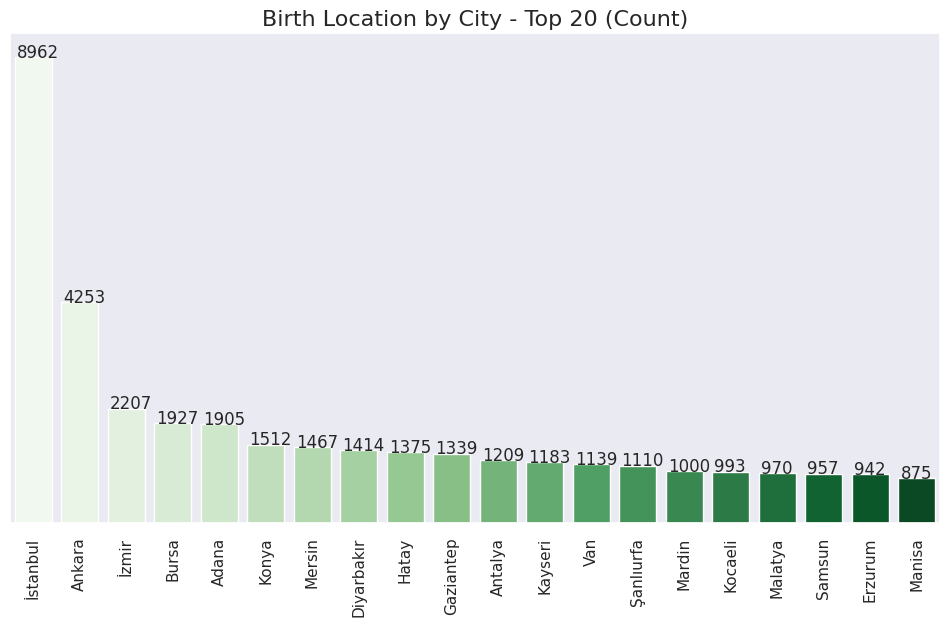

In [43]:
plt.subplots(figsize=(12,14))


plt.subplot(211)
plt.title('Birth Location by City - Top 20 (Count)', fontsize=16)
new_df=[]

ax = sns.countplot(x=train['Dogum Yeri'], palette='Greens', alpha=1, order=train['Dogum Yeri'].value_counts().head(20).index)

for p in ax.patches:
        
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()


👉 Istanbul has the highest number of birthplaces, followed by Ankara and Izmir. This concentration of birthplaces in major cities like Istanbul, Ankara, and Izmir reflects their status as key population centres in Turkey. 

### 3.2.4 University Name

👉 Some university names contain Turkish characters such as 'ı', 'ü', and 'u'. We need to address this issue to enhance our data analysis.

In [44]:
train['Universite Adi'] = train['Universite Adi'].str.upper()
train['Universite Adi'] = train['Universite Adi'].str.replace('ÜNIVERSITESI', 'ÜNİVERSİTESİ')

test['Universite Adi'] = test['Universite Adi'].str.upper()
test['Universite Adi'] = test['Universite Adi'].str.replace('ÜNIVERSITESI', 'ÜNİVERSİTESİ')


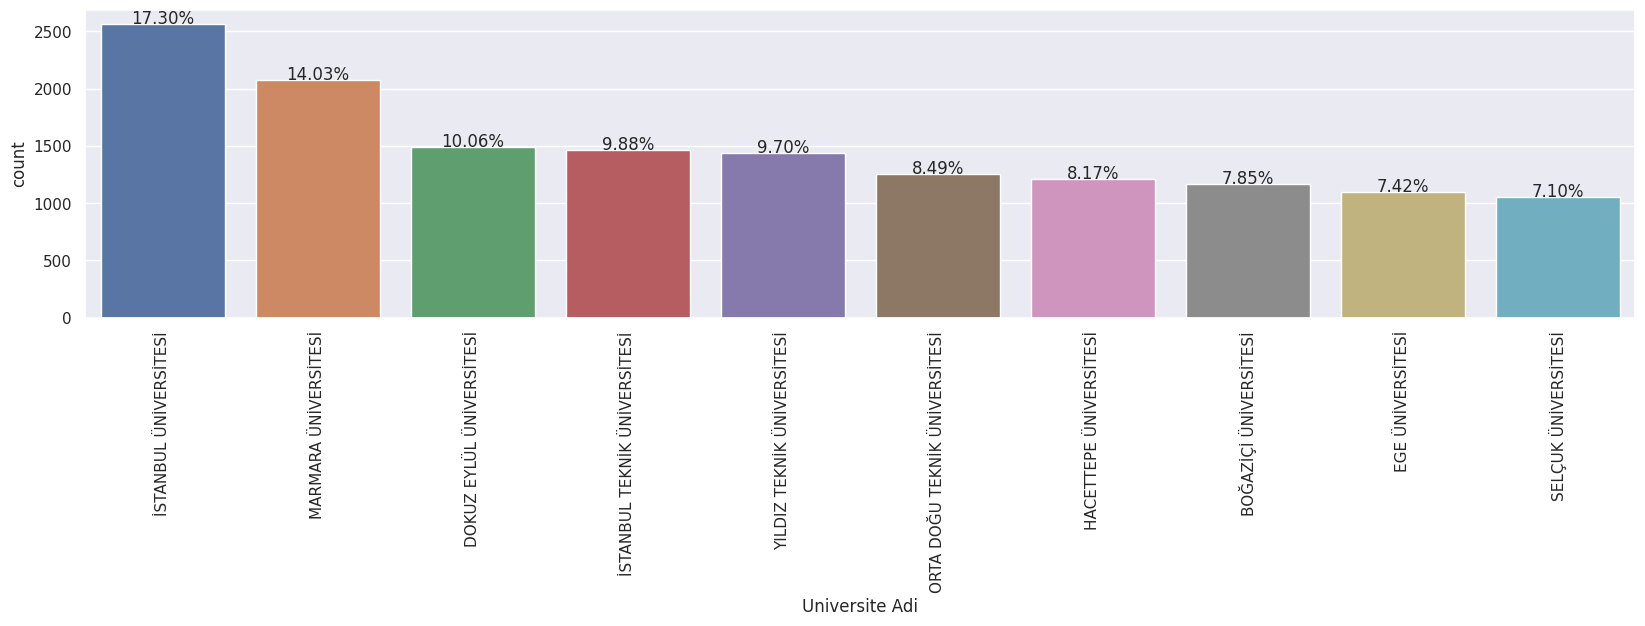

There are 208 unique universities.


In [45]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent university
top_university = train['Universite Adi'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 universities
df_top10 = train[train['Universite Adi'].isin(top_university)]

# Create a count plot for the top 10 universities
ax = sns.countplot(x="Universite Adi", data=df_top10, order=top_university)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(train['Universite Adi'].value_counts().unique()), 'unique universities.')



👉  The bar chart displays the names of the top 10 most frequently occurring universities. Istanbul University holds the highest percentage at 17.30%. It is followed by Marmara University with a 14.03% share and Dokuz Eylül University with a 10.06% share.

### 3.2.5 University Type

👉 We recognize that universities fall into two main categories: public and private institutions.

Public Universities: These institutions are funded and operated by government agencies. Public universities usually have lower tuition fees for students, thanks to funding from the government. Public universities typically have larger student populations and offer a wide range of programs and resources.

Private Universities: These institutions are funded through private sources, such as tuition fees, donations, and endowments. They usually have higher tuition costs compared to public universities but may offer smaller class sizes and more personalized attention. Private universities are often independent of government funding and may have different admissions criteria and academic programs.

Our data contains spelling errors. First, we will correct these mistakes and then proceed to visualize the data.

In [46]:
train['Universite Turu'] = train['Universite Turu'].replace('DEVLET', 'Devlet')
train['Universite Turu'] = train['Universite Turu'].replace('ÖZEL', 'Özel')

test['Universite Turu'] = test['Universite Turu'].replace('DEVLET', 'Devlet')
test['Universite Turu'] = test['Universite Turu'].replace('ÖZEL', 'Özel')

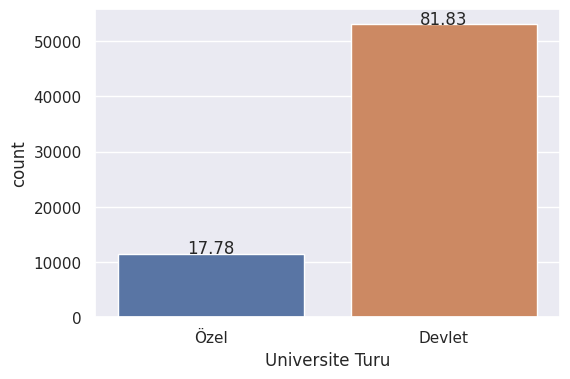

In [47]:
plt.figure(figsize=(6,4))
total = float(len(train) )

ax = sns.countplot(x="Universite Turu", data=train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

👉 In our data, 81.83% of the universities are public institutions.

### 3.2.6 Scholarship Status

👉 Our data includes spelling errors. We will begin by correcting these errors and then move on to visualizing the data.

In [48]:
train['Burs Aliyor mu?']=train['Burs Aliyor mu?'].replace('EVET','Evet')
train['Burs Aliyor mu?']=train['Burs Aliyor mu?'].replace('HAYIR','Hayır')
train['Burs Aliyor mu?']=train['Burs Aliyor mu?'].replace('evet','Evet')
train['Burs Aliyor mu?']=train['Burs Aliyor mu?'].replace('hayır','Hayır')


test['Burs Aliyor mu?']=test['Burs Aliyor mu?'].replace('EVET','Evet')
test['Burs Aliyor mu?']=test['Burs Aliyor mu?'].replace('HAYIR','Hayır')
test['Burs Aliyor mu?']=test['Burs Aliyor mu?'].replace('evet','Evet')
test['Burs Aliyor mu?']=test['Burs Aliyor mu?'].replace('hayır','Hayır')

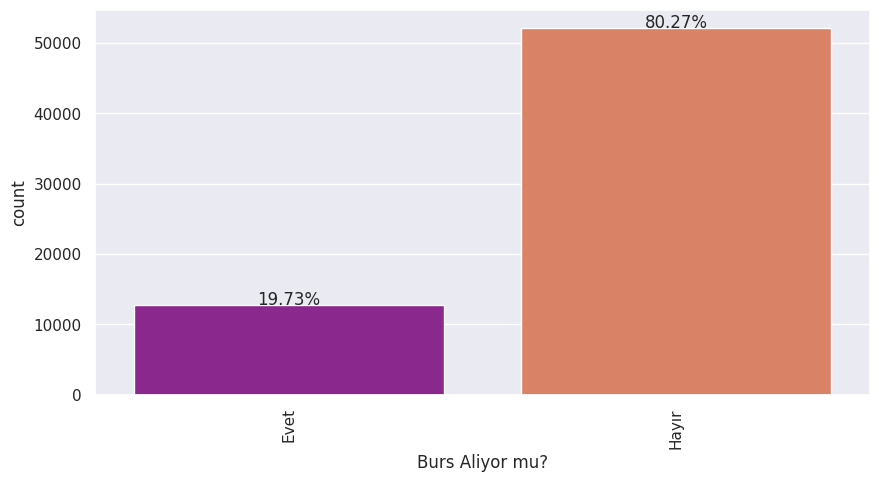

In [49]:
plt.figure(figsize=(10, 5))

# Calculate total number of entries in the 'Burs Aliyor mu?' column
total = float(len(train['Burs Aliyor mu?']))

# Create the countplot
ax = sns.countplot(x="Burs Aliyor mu?", data=train, palette="plasma")

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

# Rotate x-tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


👉 The highest proportion of students (80.27%) do not receive a scholarship.

### 3.2.7 Alternate Scholarship Institution

👉 Numerous alternative institutions offer scholarships. However, our data contains some spelling errors. For instance, we know that 'Kredi ve Yurtlar Kurumu' is commonly abbreviated as KYK. Since various versions of this name appear in the data, we can correct these inconsistencies.

In [50]:
def clean_burs_name(burs):
    if isinstance(burs, str):
        # Convert all variations to lowercase for case-insensitive matching
        burs = burs.lower()
        burs = burs.replace('kredi ve yurtlar kurumu', 'KYK')
        burs = burs.replace('kredi yurtlar kurumu', 'KYK')
        burs = burs.replace('kredi̇ yurtlar kurumu', 'KYK')
        burs = burs.replace('kredi ve yurtlar genel müdürlüğü', 'KYK')
        burs = burs.replace('kyk* (girvak şartlarına uymadığı taktirde iptal ettireceğim.)', 'KYK')
        burs = burs.replace('kyk yök bursu', 'KYK')
        burs = burs.replace('kyk', 'KYK')
        burs = burs.replace('kyk bursu', 'KYK')
        burs = burs.replace('kyk devlet', 'KYK')
        burs = burs.replace('kyk kredi', 'KYK')
        burs = burs.replace("kyk'dan kredi alıyorum", 'KYK')
        burs = burs.replace('devlet bursu', 'Devlet')
        burs = burs.replace('devlet', 'Devlet')
        burs = burs.replace('devlet kredi', 'Devlet')
        burs = burs.replace('devlet geri ödemeli', 'Devlet')
        burs = burs.replace('devletten geri ödemeli', 'Devlet')
        burs = burs.replace('yüksek öğretim kurumları', 'YÖK')
        burs = burs.replace('yök', 'YÖK')
        burs = burs.replace('yök kredi', 'YÖK')
        burs = burs.replace('yök bursu', 'YÖK')
        burs = burs.replace('yök ösym', 'YÖK')
        burs = burs.replace('yök üstün başarı bursu alıyorum', 'YÖK')
        burs = burs.replace('yök bölüme birinci girme bursu', 'YÖK')
        burs = burs.replace('yök eğitim bursu', 'YÖK')
        burs = burs.replace('gençlik ve spor bakanlığından yök kredisi alıyorum', 'YÖK')
        burs = burs.replace('gençlik ve spor bakanlığından yöksi alıyorum', 'YÖK')
        burs = burs.replace('kyk ve yök destek bursu', 'KYK ve YÖK')
        burs = burs.replace('kyk (başbakanlık bursu)', 'Başbakanlık bursu')
        burs = burs.replace('başbakanlık bursu alıyorum', 'Başbakanlık bursu')
        burs = burs.replace('vakiflar genel müdürlüğü/başbakanlik bursu', 'Başbakanlık bursu')
        burs = burs.replace("tev'den alıyorum ancak not ortalamam düştüğü için bu sene kesilecek.", 'TEV')
        burs = burs.replace('tev', 'TEV')
        burs = burs.replace('türk eğitim vakfı (tev)', 'TEV')
        burs = burs.replace('başbakanlık bursu-tev üstün başarı bursu', 'TEV-Başbakanlık bursu')
        burs = burs.replace('başbakanlık bursu -devlet', 'Başbakanlık bursu')
        burs = burs.replace('devletten başbakanlık bursu', 'TEV-Başbakanlık bursu')
        burs = burs.replace('ekev kurumuz', 'EKEV')
        burs = burs.replace('ekev', 'EKEV')
        burs = burs.replace('ekev vakfi', 'EKEV')
        burs = burs.replace('ekev vakfı', 'EKEV')
        burs = burs.replace('ekev- birlik vakfı', 'EKEV')
        burs = burs.replace('tüçev türkiye çevre koruma vakfı yüksek lisans bursu', 'TÜÇEV')
        burs = burs.replace('çağdaş eğitim vakfı', 'ÇEV')
        burs = burs.replace('vakıflar genel müdürlüğü', 'Vakıf')
        burs = burs.replace('vakıf', 'Vakıf')
        burs = burs.replace('kredi yurtlar kurumundan oğrenim kredisi', 'KYK')
        burs = burs.replace('k', 'KYK')
        burs = burs.replace('-', 'Burs Almıyor')

    return burs


In [51]:
train['Burs Aldigi Baska Kurum'] = train['Burs Aldigi Baska Kurum'].apply(clean_burs_name)
test['Burs Aldigi Baska Kurum'] = test['Burs Aldigi Baska Kurum'].apply(clean_burs_name)

In [52]:
print('There are', train['Burs Aldigi Baska Kurum'].value_counts().nunique(),'unique institutions available in data.')

There are 51 unique institutions available in data.


👉 There are numerous distinct institutions in the data. We will consolidate these institutions under a unified name.

In [53]:
def clean_burs_kurum(df):
    # Modify the 'Burs Aldigi Baska Kurum' column in-place and return the entire DataFrame
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('KYK', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'KYK'
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('vakfı', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'Vakıf'
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('derneği', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'Dernek'
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('dernegi', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'Dernek'
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('üniversitesi', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'Üniversite'
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('devlet', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'Devlet'
    df.loc[df['Burs Aldigi Baska Kurum'].str.contains('başbakanlık', case=False, na=False), 'Burs Aldigi Baska Kurum'] = 'Başbakanlık'
    
    return df['Burs Aldigi Baska Kurum']  # Return only the modified column

# Apply to both train and test dataframes
train['Burs Aldigi Baska Kurum'] = clean_burs_kurum(train)
test['Burs Aldigi Baska Kurum'] = clean_burs_kurum(test)


👉 We will determine the frequency of each institution, then filter out those with occurrences below 100 and categorize them as 'Private' institutions."

In [54]:
# Calculate the frequency of values in the 'Burs Aldigi Baska Kurum' column
value_counts = train['Burs Aldigi Baska Kurum'].value_counts()
value_counts_test = test['Burs Aldigi Baska Kurum'].value_counts()

# Select values that occur less than 100 times
unique_counts_test = value_counts_test[value_counts_test < 100].index
unique_counts = value_counts[value_counts < 100].index

# Update the rows containing these values to 'Özel' (special)
train.loc[train['Burs Aldigi Baska Kurum'].isin(unique_counts), 'Burs Aldigi Baska Kurum'] = 'Özel'
test.loc[test['Burs Aldigi Baska Kurum'].isin(unique_counts_test), 'Burs Aldigi Baska Kurum'] = 'Özel'


⭐ Visualizing Alternative Scholarship Data

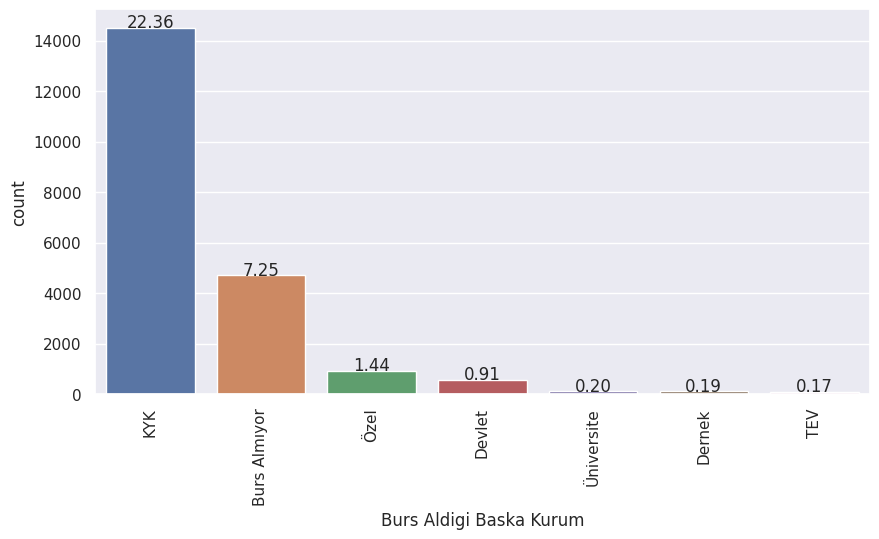

In [55]:

# Calculate the frequency of each institution
value_counts = train['Burs Aldigi Baska Kurum'].value_counts()

# Sort the values and create a sorted DataFrame for plotting
sorted_values = value_counts.sort_values(ascending=False)
sorted_df = pd.DataFrame({'Burs Aldigi Baska Kurum': sorted_values.index, 'Count': sorted_values.values})

# Plotting
plt.figure(figsize=(10, 5))
total = float(len(train['Burs Aldigi Baska Kurum']))

# Create a countplot with sorted values
ax = sns.countplot(x="Burs Aldigi Baska Kurum", data=train, order=sorted_values.index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}'.format((height / total) * 100),
            ha="center")

plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


👉 It is evident that 'KYK' (Kredi Yurtlar Kurumu) is the leading scholarship provider. Additionally, 7.25% of individuals do not have any scholarship. The rates for other institutions are relatively low."

### 3.2.8 University Departmant

👉 Turkey is home to approximately 200 universities, each featuring over 1,000 departments that offer a range of programs. Our data, however, shows 175 distinct departments. Unfortunately, these department names contain spelling errors. We will correct these errors and then visualize the corrected data.

In [56]:
train['Bölüm'].value_counts().nunique()

175

In [57]:
def clean_bolum(bolum):
    if isinstance(bolum, str):
    
        bolum = bolum.replace('Muhendisliği', 'Mühendisliği')
        bolum = bolum.replace('Muhendisligi', 'Mühendisliği')
        bolum = bolum.replace('Müheng', 'Mühendisliği')
        bolum = bolum.replace('Müh', 'Mühendisliği')
        bolum = bolum.replace('Mühendisliğiendi̇si̇', 'Mühendisliği')
        bolum = bolum.replace('Mühendi̇si̇', 'Mühendisliği')
        bolum = bolum.replace('Mühendsiliği', 'Mühendisliği')
        bolum = bolum.replace('Muhendislik', 'Mühendisliği')
        bolum = bolum.replace('Mühendi̇Sli̇ği̇', 'Mühendisliği')
        bolum = bolum.replace('Mühendisliğiendi̇si̇', 'Mühendisliği')
        bolum = bolum.replace('Ing', 'İngilizce')
        bolum = bolum.replace('İngilizceilizce', 'İngilizce')
        bolum = bolum.replace('Mühendisliğiingilizce', 'Mühendisliği İngilizce')
        bolum = bolum.replace('İlahiyat Fakultesi', 'İlahiyat Fakültesi')
        bolum = bolum.replace('PazarlamaLisans', 'Pazarlama')
        bolum = bolum.replace('turizm isletmeciligi', 'Turizm İşletmeciliği')
        bolum = bolum.replace('siyaset bilimi ve uluslar arası ilişkiler', 'Siyaset Bilimi ve Uluslararası İlişkiler')
        bolum = bolum.replace('Endüstri̇ Mühendi̇Sli̇Ği̇Maki̇Na Mühendi̇Sli̇Ği̇ Çap', 'Endüstri Mühendisliği Makina Mühendisliği Çap')
        bolum = bolum.replace('Deni̇Zci̇Li̇K', 'Denizcilik')
        bolum = bolum.replace('Deni̇Z', 'Deniz')
        bolum = bolum.replace('Li̇Man', 'Liman')
        bolum = bolum.replace('İşletmeci̇Li̇ği̇', 'İşletmeciliği')
        bolum = bolum.replace('Yöneti̇Mi̇', 'Yönetimi')
        bolum = bolum.replace('Mühendisliğiingilizce', 'Mühendisliği İngilizce')
        bolum = bolum.replace('İMalat', 'İmalat')
        bolum = bolum.replace('Ilişkilerıngilizce', 'İlişkiler İngilizce')
        bolum = bolum.replace('İŞletmeleri', 'İşletmeleri')
        bolum = bolum.replace('Yönetimii̇Ngi̇Li̇Zce', 'Yönetimi İngilizce')
        bolum = bolum.replace('İki̇nci̇ Öğreti̇m', 'İkinci Öğretim')
        bolum = bolum.replace('Ikinci Öğretim', 'İkinci Öğretim')
        bolum = bolum.replace('Matemati̇K', 'Matematik')
        bolum = bolum.replace('Elektri̇K', 'Elektrik')
        bolum = bolum.replace('Mühendisliğiendisliği', 'Mühendisliği')
        bolum = bolum.replace('Tip', 'Tıp')
        bolum = bolum.replace('Türkçe Tıp', 'Tıp')
        bolum = bolum.replace('Proğramı', 'Programı')
        bolum = bolum.replace('Elektroni̇K', 'Elektronik')
        bolum = bolum.replace('Örgün olarak İşletme okuyorum ve İkinci Üniversite adı altında İstanbul Üniversitesi Uluslararası Ticaret ve Lojistik Yönetimi bölümü açıköğretim öğrencisiyim.', 'İşletme')
    return bolum


In [58]:
train['Bölüm'] = train['Bölüm'].apply(clean_bolum)
test['Bölüm'] = test['Bölüm'].apply(clean_bolum)

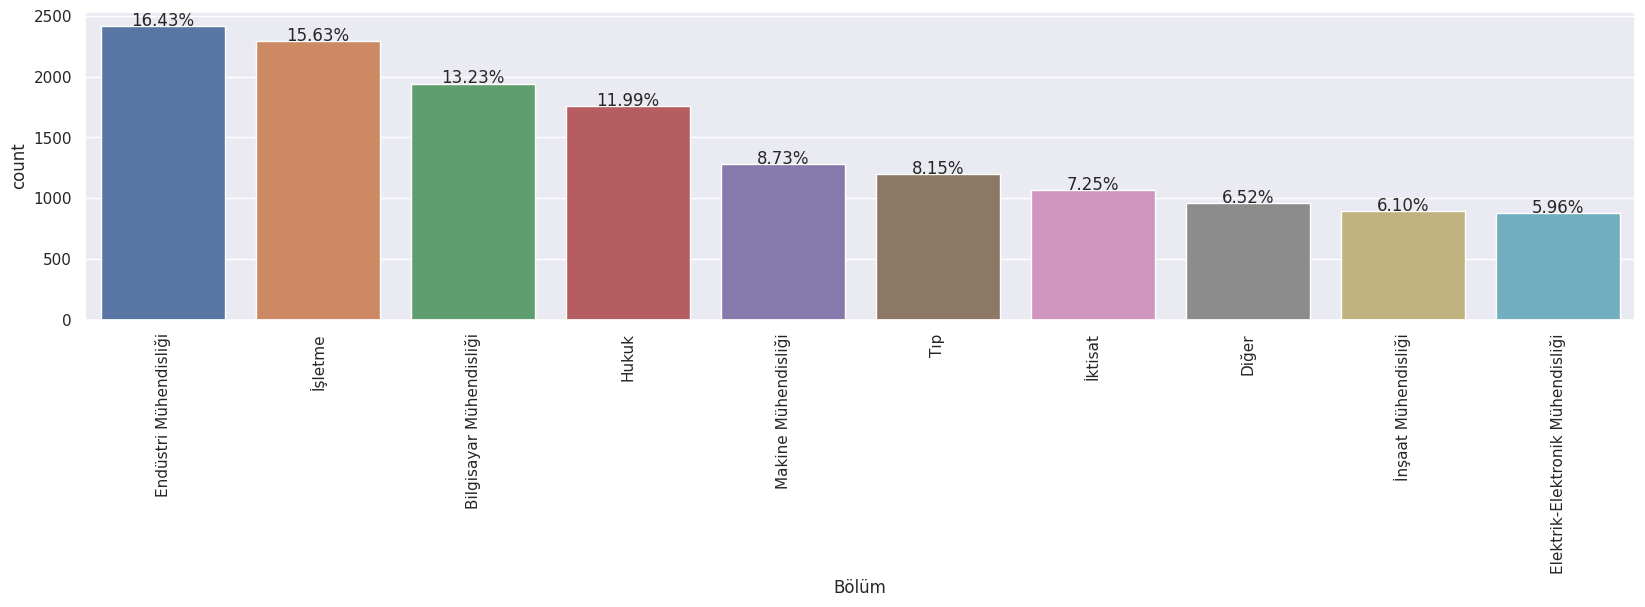

There are 176 unique departmans.


In [59]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent neighborhoods
top_neighborhoods = train['Bölüm'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 neighborhoods
df_top10 = train[train['Bölüm'].isin(top_neighborhoods)]

# Create a count plot for the top 10 neighborhoods
ax = sns.countplot(x="Bölüm", data=df_top10, order=top_neighborhoods)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print('There are', len(train['Bölüm'].value_counts().unique()), 'unique departmans.')



👉 The highest percentage is observed in the Industrial Engineering and Business Department.

#### 3.2.8.1 Faculties

In [60]:
def standardize_branch_names(df):
    # Dictionary to map department names to standardized branch names
    mapping = {
        'Mühendisliği': 'Mühendis',
        'Öğretmen': 'Öğretmen',
        'Hukuk': 'Hukuk',
        'İşletme': 'İşletme',
        'TIP': 'Tip',
        'İletişim': 'İletişim',
        'Sanat': 'Güzel Sanatlar',
        'Sağlık': 'Sağlık Bilimleri'
    }
    
    # Apply the mapping
    for key, value in mapping.items():
        df.loc[df['Bölüm'].str.contains(key, case=False, na=False), 'Branş'] = value
    
    
    return df

# Apply the function to both train and test datasets
train = standardize_branch_names(train)
test = standardize_branch_names(test)


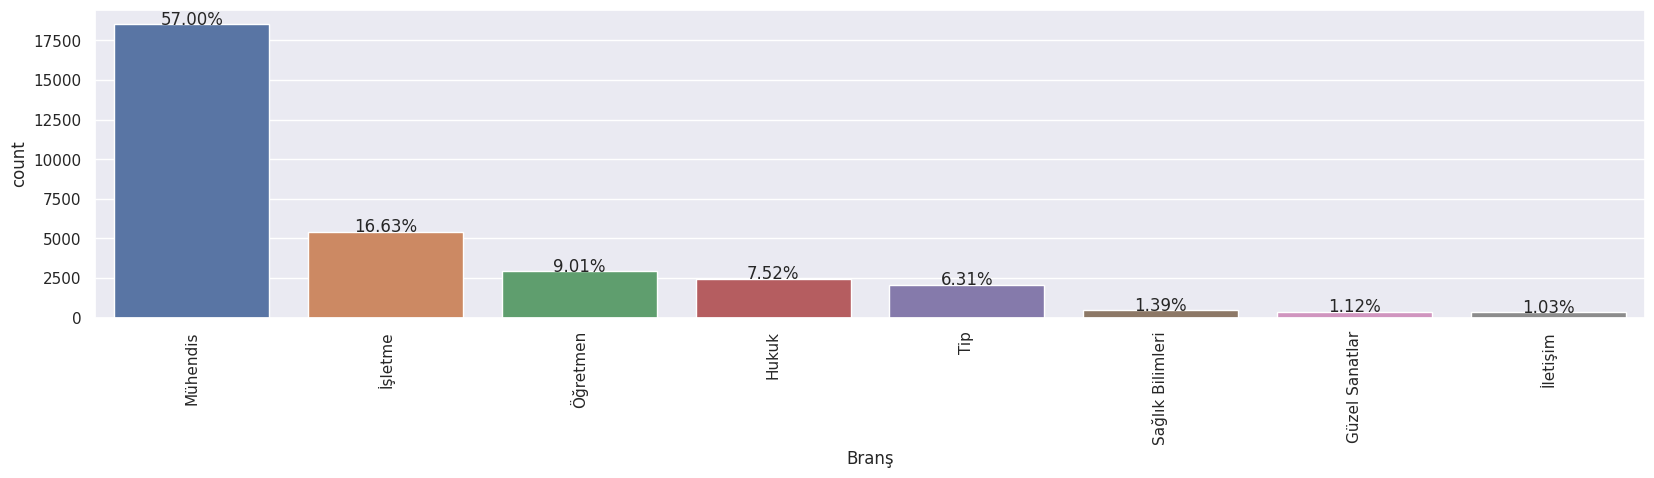

In [61]:

plt.figure(figsize=(20, 4))

# Get the top 10 most frequent faculties
top_faculty = train['Branş'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 faculties
df_top10 = train[train['Branş'].isin(top_faculty)]

# Create a count plot for the top 10 faculties
ax = sns.countplot(x="Branş", data=df_top10, order=top_faculty)

# Annotate each bar with the percentage of total occurrences
total = float(len(df_top10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center")

# Display the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()



👉 Engineering has the highest proportion compared to other faculties.

In [62]:
train['Branş']=train['Branş'].fillna('Diğer')
test['Branş']=test['Branş'].fillna('Diğer')

#### 3.2.8.2 Academic Degrees 

In [63]:
# Function to determine the level of education based on the department field
def determine_egitim_durumu(bolum):
    if isinstance(bolum, str): 
        bolum_lower = bolum.strip().lower() 
        if re.search(r'yüksek lisans', bolum_lower):
            return 'Yüksek Lisans'
        elif re.search(r'doktora', bolum_lower):
            return 'Doktora'
        elif re.search(r'ön lisans', bolum_lower):
            return 'Ön Lisans'
        elif re.search(r'lisans', bolum_lower):
            return 'Lisans'
    return 'Lisans' 

# Apply the function to determine the education level in the train and test datasets
train['Akademik Alan'] = train['Bölüm'].apply(determine_egitim_durumu)
test['Akademik Alan'] = test['Bölüm'].apply(determine_egitim_durumu)

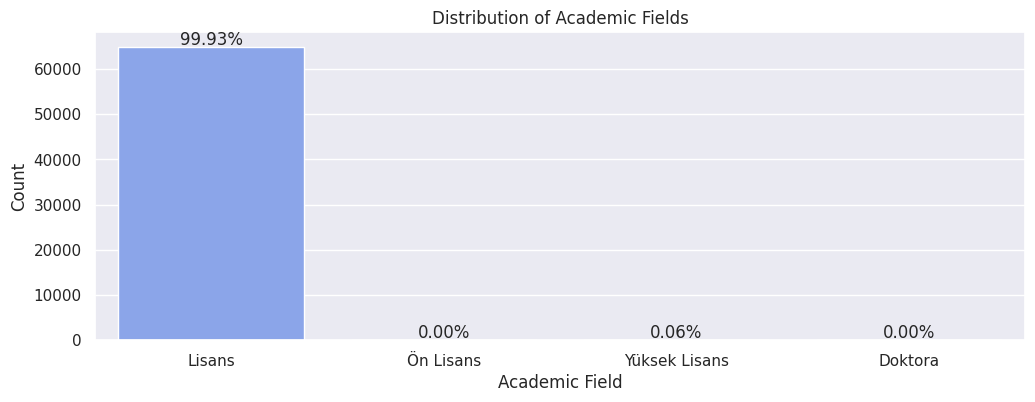

In [64]:
# Plotting a chart for academic degrees
plt.figure(figsize=(12, 4))

# Calculate total count
total = len(train['Akademik Alan'])

# Create the countplot
ax = sns.countplot(x="Akademik Alan", data=train, palette="coolwarm")

# Add percentage annotations
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', 
                va='center',
                xytext=(0, 5), 
                textcoords='offset points')

# Set title and labels
plt.title('Distribution of Academic Fields')
plt.xlabel("Academic Field")
plt.ylabel("Count")
plt.show()


👉 The largest proportion of people are enrolled in undergraduate programs, followed by those in master's, pre-graduate, and doctoral studies.

In [65]:
train['Akademik Alan'].value_counts().unique

<bound method Series.unique of Akademik Alan
Lisans           64896
Yüksek Lisans       40
Ön Lisans            2
Doktora              1
Name: count, dtype: int64>

#### 3.2.8.3 Academic Specializations

In [66]:
def determine_egitim_durumu(bolum):
    if isinstance(bolum, str):  # sadece string değerleri kontrol et
        bolum_lower = bolum.strip().lower()  # boşlukları temizle ve küçük harfe çevir
        if re.search(r'çift anadal', bolum_lower):
            return 'Çap'
        if re.search(r'ikinci anadal', bolum_lower):
            return 'Çap'
        elif re.search(r'çap', bolum_lower):
            return 'Çap'
        elif re.search(r'yandal', bolum_lower):
            return 'Yandal'
     
    return 'Normal'  # NaN veya diğer durumlar için


train['Eğitim Türü'] = train['Bölüm'].apply(determine_egitim_durumu)
test['Eğitim Türü'] = test['Bölüm'].apply(determine_egitim_durumu)

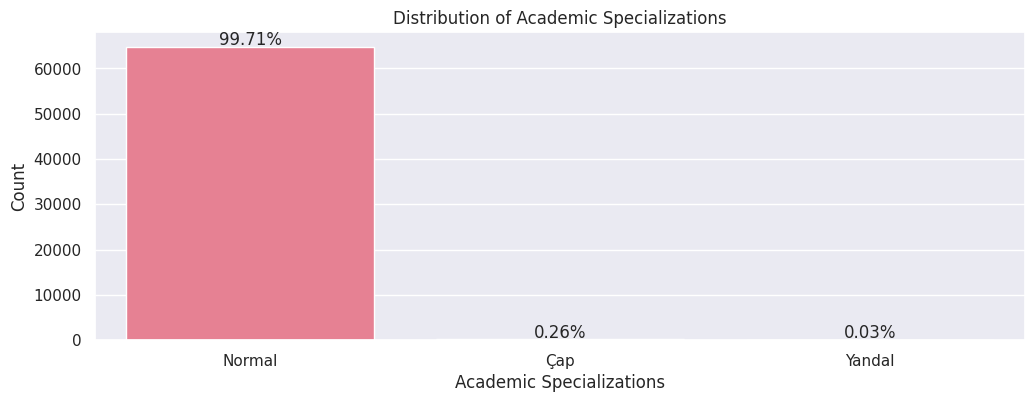

In [67]:
# Plotting a chart for academic degrees
plt.figure(figsize=(12, 4))

# Calculate total count
total = len(train['Eğitim Türü'])

# Create the countplot
ax = sns.countplot(x="Eğitim Türü", data=train, palette="husl")

# Add percentage annotations
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', 
                va='center',
                xytext=(0, 5), 
                textcoords='offset points')

# Set title and labels
plt.title('Distribution of Academic Specializations')
plt.xlabel("Academic Specializations")
plt.ylabel("Count")
plt.show()


👉 Most students are engaged in traditional full-time studies, with only 0.26% enrolled in double major programs and 0.03% pursuing a minor.

In [68]:
train['Eğitim Türü'].value_counts().unique

<bound method Series.unique of Eğitim Türü
Normal    64748
Çap         170
Yandal       21
Name: count, dtype: int64>

#### 3.2.8.4 Removing Unnecessary Patterns from Data

In [69]:
# Define patterns to remove
patterns_to_remove = ['Tam', 'Burslu', 'Tam Burslu', '%100 Burslu', '%50 Burslu', '%75 Burslu', '%25 Burslu',
                      'Yarı Burs', 'Tr Sıralama: 5000', 'Burs Almıyorum', 'Tezli', 'Yüksek Lisans', 'Doktora',
                      'Kyk Bursu Aliyorum', 'Gerçekten Bursa Cok Ihtiyacım Var Egitimi Tamamlayabilmem Icin', 'ösym',
                      '(İkinci Öğretim)', 'İKİNCİ ÖĞRETİM', 'Çift Anadal',
                      'Temel Ihtiyaclarimi Karsilamak Icin Bu Bursa Ihtiyacim Var.', '(%100 Applybau Girişim Bursu)',
                      'çap', 'Çap', 'Yandal', 'yandal', 'Hala lisedeyim']

# Function to remove specified patterns from the dataframe
def remove_patterns(field):
    if isinstance(field, str):
        for pattern in patterns_to_remove:
            field = field.replace(pattern, '')
        return field.strip()  # Removes leading and trailing spaces
    return field  # Returns the field unchanged if it's not a string

# Apply the function to remove patterns from 'Bölüm' column
train['Bölüm'] = train['Bölüm'].apply(remove_patterns)
test['Bölüm'] = test['Bölüm'].apply(remove_patterns)


### 3.2.9 University Grade

In [70]:
train['Universite Kacinci Sinif']=train['Universite Kacinci Sinif'].replace('0','Hazırlık')
train['Universite Kacinci Sinif']=train['Universite Kacinci Sinif'].replace('hazırlık','Hazırlık')

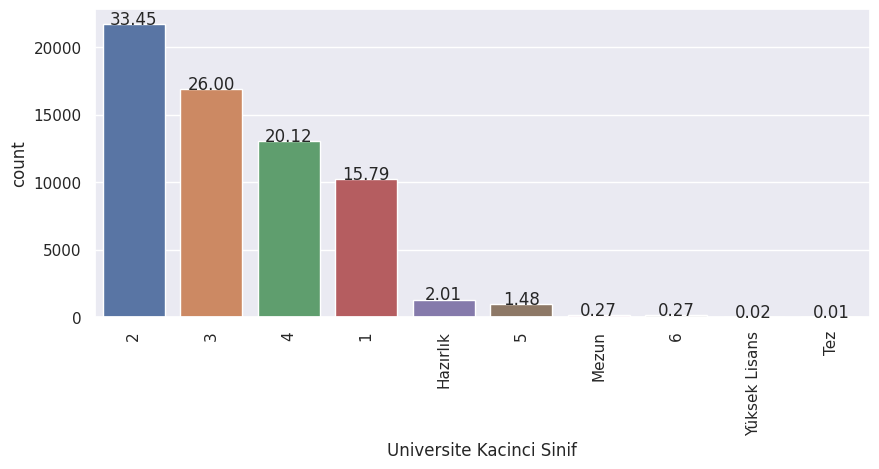

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each category
value_counts = train['Universite Kacinci Sinif'].value_counts()

# Sort categories based on their counts
sorted_categories = value_counts.index

# Create a figure with a specific size
plt.figure(figsize=(10, 4))

# Plot the count plot with the sorted order
ax = sns.countplot(x="Universite Kacinci Sinif", data=train, order=sorted_categories)

# Total number of observations
total = float(len(train))

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}'.format((height / total) * 100),
            ha="center")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


👉 The data shows that the majority of students are in their second year of university, representing 33.45% of the sample. Following this, 26% are in their third year, 20.12% are in their fourth year, and 15.79% are in their first year. There are very few students in preparatory, fifth-year, graduate, and master's programs.

### 3.2.10 University GPA

👉 University GPA (Grade Point Average) is a measure of a student's academic performance, calculated by averaging the grades they earn in their courses. It typically reflects a student's overall academic achievement during their time at university

In [72]:
# Define the replacement dictionary
replacement_dict = {
    'ORTALAMA BULUNMUYOR': 'Ortalama Bulunmuyor',
    'Ortalama bulunmuyor': 'Ortalama Bulunmuyor',
    'Not ortalaması yok': 'Ortalama Bulunmuyor',
    '-': 'Ortalama Bulunmuyor'
}

# Apply the replacement to both train and test dataframes
#train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].replace(replacement_dict)
#test['Universite Not Ortalamasi'] = test['Universite Not Ortalamasi'].replace(replacement_dict)


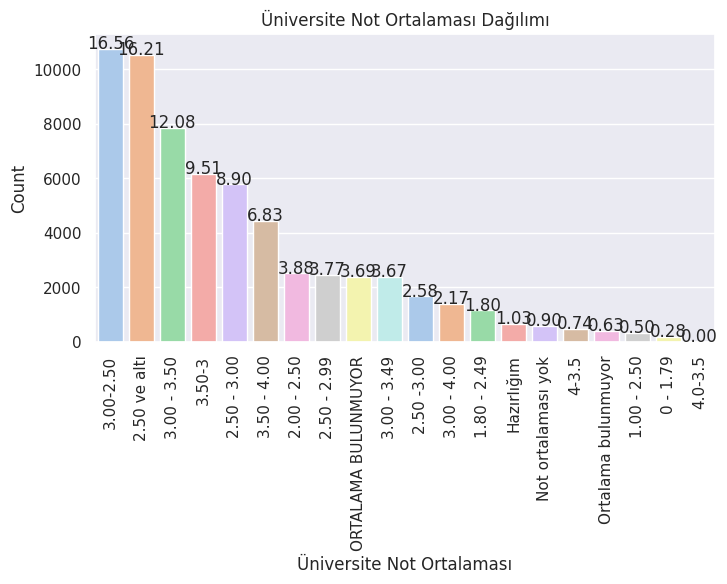

In [73]:
# Ensure 'Universite Not Ortalamasi' is treated as a categorical variable with sorted order
sorted_categories = train['Universite Not Ortalamasi'].value_counts().index
train['Universite Not Ortalamasi'] = pd.Categorical(train['Universite Not Ortalamasi'], categories=sorted_categories, ordered=True)

# Plotting the sorted values
plt.figure(figsize=(8, 4))

# Countplot with sorted categories
ax = sns.countplot(x="Universite Not Ortalamasi", data=train, palette="pastel")

# Adding percentage text to the bars
total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}'.format((height / total) * 100),
            ha="center")

# Formatting the plot
plt.xticks(rotation=90)
plt.title('Üniversite Not Ortalaması Dağılımı')
plt.xlabel('Üniversite Not Ortalaması')
plt.ylabel('Count')
plt.show()
train['Universite Not Ortalamasi']=train['Universite Not Ortalamasi'].astype('object')


1. **Most Common GPA Ranges**:
   - **3.00-2.50 (10756 occurrences)**: This is the most frequently reported GPA range, indicating a substantial number of students fall within this category.
   - **2.50 and below (10528 occurrences)**: Almost as common as the previous range, suggesting a significant proportion of students have GPAs in this lower range.
   - **3.00 - 3.50 (7844 occurrences)**: Another popular range, showing a considerable number of students have GPAs just above the 3.00 mark.

2. **Moderately Common GPA Ranges**:
   - **3.50-3.00 (6178 occurrences)**: This range shows a substantial number of students have GPAs around the higher end of the scale but not reaching 4.00.
   - **2.50 - 3.00 (5782 occurrences)**: This range overlaps with the lower end of the 3.00-3.50 range, indicating students just below the 3.00 mark are well-represented.
   - **3.50 - 4.00 (4438 occurrences)**: Represents a notable number of students with higher GPAs, though less common than the mid-range GPAs.

3. **Less Frequent GPA Ranges**:
   - **Ortalama Bulunmuyor (3397 occurrences)**: Indicates students for whom GPA averages are not reported, which might reflect missing or unavailable data.
   - **2.00 - 2.50 (2519 occurrences)**: Represents a smaller but significant proportion of students with lower GPAs.
   - **2.50 - 2.99 (2451 occurrences)**: Slightly less common but still shows a substantial group of students.

4. **Least Common GPA Ranges**:
   - **3.00 - 3.49 (2382 occurrences)**: This range is slightly less frequent but still notable.
   - **2.50 - 3.00 (1676 occurrences)**: An overlap with previous ranges, showing the frequency of students in this GPA range is lower.
   - **3.00 - 4.00 (1407 occurrences)**: This range includes students with GPAs from 3.00 up to 4.00 but is less common compared to other ranges.

5. **Rarely Reported GPA Ranges**:
   - **1.80 - 2.49 (1166 occurrences)**: Represents a smaller group of students with GPAs on the lower end.
   - **Hazırlığım (668 occurrences)**: This might indicate students who are in preparatory or non-degree programs.
   - **4.00 - 3.5 (481 occurrences)**: Suggests a very small group with GPA around 3.5 to 4.0.
   - **1.00 - 2.50 (327 occurrences)**: Very few students fall into this lower GPA range.
   - **0 - 1.79 (185 occurrences)**: Extremely rare, indicating very low GPAs.


### 3.2.11 Previously Graduated from Another University

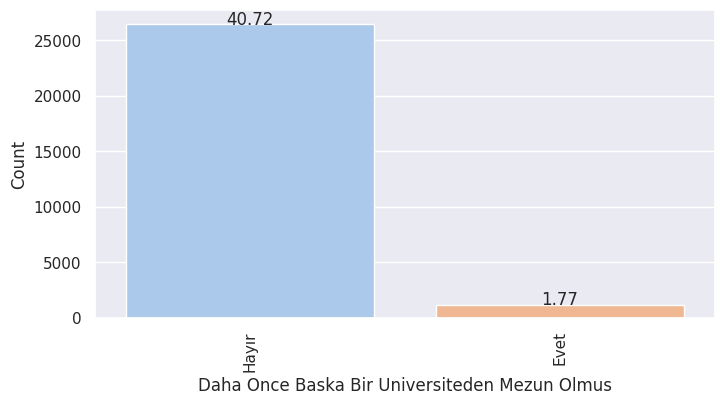

In [74]:
# Ensure 'Daha Once Baska Bir Universiteden Mezun Olmus' is treated as a categorical variable with sorted order
sorted_categories = train["Daha Once Baska Bir Universiteden Mezun Olmus"].value_counts().index
train["Daha Once Baska Bir Universiteden Mezun Olmus"] = pd.Categorical(train["Daha Once Baska Bir Universiteden Mezun Olmus"], categories=sorted_categories, ordered=True)

# Plotting the sorted values
plt.figure(figsize=(8, 4))

# Countplot with sorted categories
ax = sns.countplot(x="Daha Once Baska Bir Universiteden Mezun Olmus", data=train, palette="pastel")

# Adding percentage text to the bars
total = float(len(train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.2f}'.format((height / total) * 100),
            ha="center")

# Formatting the plot
plt.xticks(rotation=90)
#plt.title('Daha Once Baska Bir Universiteden Mezun Olmus Mu?')
#ax.set_xticklabels([])  # Remove x-axis labels
plt.ylabel('Count')
plt.show()
train['Daha Once Baska Bir Universiteden Mezun Olmus']=train['Daha Once Baska Bir Universiteden Mezun Olmus'].astype('object')


👉 In the column chart, it can be seen that 40.72% did not attend a second university.

### 3.2.12 Sports Participation and Role

#### 3.2.12.1 Are you involved in a professional sport?

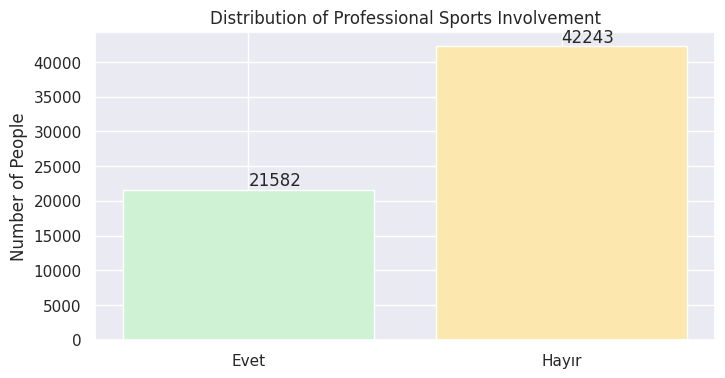

In [75]:
# Define the labels and values
labels_pie = ["Evet", "Hayır",]

values = train['Profesyonel Bir Spor Daliyla Mesgul musunuz?'].value_counts().reindex(labels_pie, fill_value=0).values

# Define the colors for each category
colors = [ '#d0f2d4', '#fce8ae']

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(labels_pie, values, color=colors)

# Add labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

# Set title and labels
plt.title('Distribution of Professional Sports Involvement')
plt.xlabel('')
plt.ylabel('Number of People')

# Show the plot
plt.xticks(rotation=360)  # Rotate labels if needed
plt.show()


👉 The majority of participants answered 'No' to the question of whether they are involved in a professional sport (42,243 people), as clearly shown in the graph.

#### 3.2.12.2 What is Your Role in the Sport?

In [76]:
# Define the replacement mappings
replacement_dict = {
    'DİĞER': 'Diğer',
    'KAPTAN / LİDER': 'Lider/Kaptan',
    'Kaptan': 'Lider/Kaptan',
    '-': 'Bilinmiyor',
    'Diger': 'Diğer',
    '0': 'Bilinmiyor'
}

# Apply replacements to both train and test DataFrames
train['Spor Dalindaki Rolunuz Nedir?'] = train['Spor Dalindaki Rolunuz Nedir?'].replace(replacement_dict)
test['Spor Dalindaki Rolunuz Nedir?'] = test['Spor Dalindaki Rolunuz Nedir?'].replace(replacement_dict)


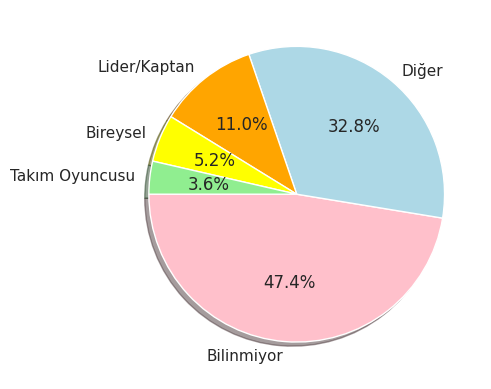

In [77]:
labels_pie = ["Bilinmiyor","Diğer",'Lider/Kaptan','Bireysel','Takım Oyuncusu']
values = train['Spor Dalindaki Rolunuz Nedir?'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['pink', 'lightblue','orange','yellow','lightgreen']
ax1.pie(values, labels=labels_pie, autopct='%1.1f%%',shadow=True,startangle=180,colors=colors)
plt.show()

👉 Looking at the pie chart, it’s clear that 11% of people identify as Leader or Captain, 5.2% identify as Individual, and 3.6% identify as Team Player. A significant portion of the data is marked as 'Other' or is left empty.

### 3.2.13 High School Background

#### 3.2.13.1 Name of High School

In [78]:
high_school_name={ 
    'lisesi':'Lisesi',
    'aöl':'Açık Öğretim Lisesi',
    'AÖL':'Açık Öğretim Lisesi',
    '------':'Belirtilmemiş',
    'Mealek':'Meslek',
    'Atatürk Lisesi':'Atatürk Anadolu Lisesi',
    'Açıköğretim Lisesi':'Açık Öğretim Lisesi'

}

# Apply replacements to both train and test DataFrames
train['Lise Adi'] = train['Lise Adi'].replace(high_school_name)
train['Lise Adi']=train['Lise Adi'].str.title()
test['Lise Adi'] = test['Lise Adi'].replace(high_school_name)
test['Lise Adi']=test['Lise Adi'].str.title()

train['Lise Adi'] = train['Lise Adi'].str.replace('i̇', 'i', regex=False)
test['Lise Adi'] = test['Lise Adi'].str.replace('i̇', 'i', regex=False)

train['Lise Adi'] = train['Lise Adi'].str.replace('İ', 'İ', regex=False)
test['Lise Adi'] = test['Lise Adi'].str.replace('İ', 'İ', regex=False)

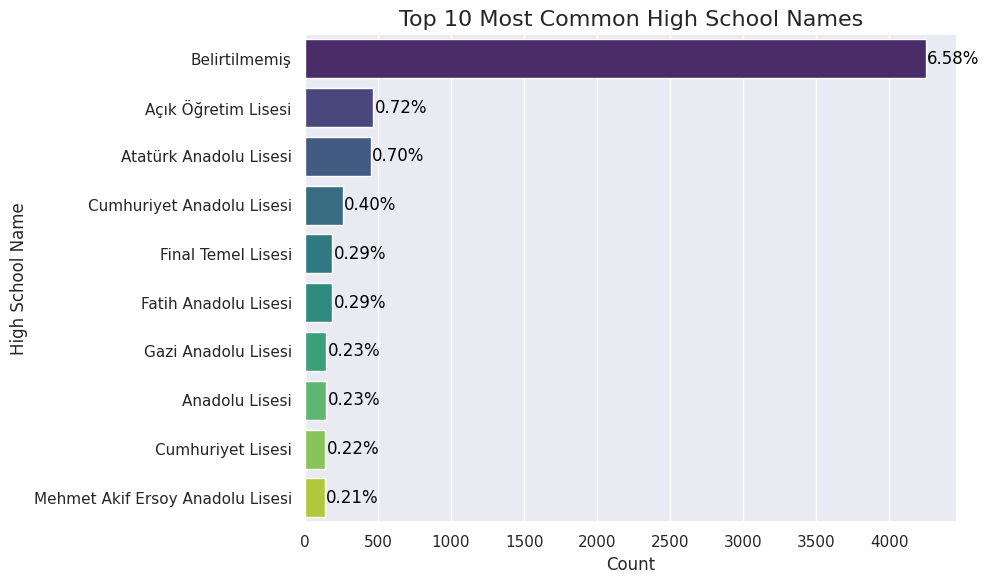

In [79]:

# Get the top 10 high school names
top_10_lise = train['Lise Adi'].value_counts().head(10)

# Calculate percentage values
total_students = train['Lise Adi'].count()
percentages = (top_10_lise / total_students) * 100

# Create bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_lise.values, y=top_10_lise.index, palette='viridis')

# Annotate each bar with percentage values
for i, v in enumerate(top_10_lise.values):
    ax.text(v + 10, i, f'{percentages[i]:.2f}%', color='black', va='center')

# Add title and labels
plt.title('Top 10 Most Common High School Names', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('High School Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


👉 The chart contains the top 10 most frequently mentioned high school names. The most common response from participants was that no high school name was provided, with a rate of 6.58%. The most mentioned high school is Open Education High School, followed by Atatürk and Cumhuriyet Anatolian High Schools.

#### 3.2.13.2 City of High School

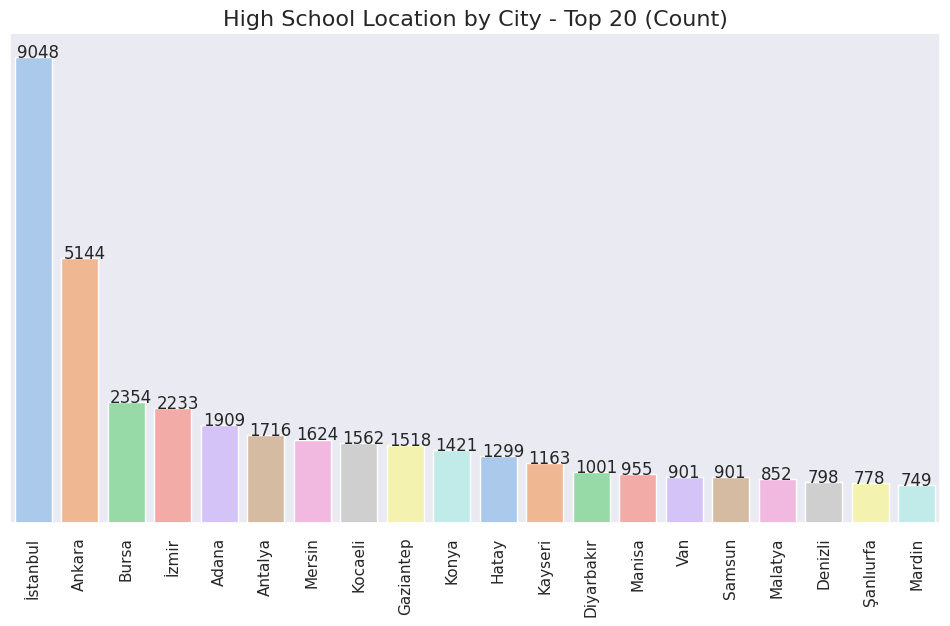

In [80]:
plt.subplots(figsize=(12,14))

plt.subplot(211)
plt.title('High School Location by City - Top 20 (Count)', fontsize=16)
new_df=[]

ax = sns.countplot(x=train['Lise Sehir'], palette='pastel', alpha=1, order=train['Lise Sehir'].value_counts().head(20).index)

for p in ax.patches:
        
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()


👉 The cities with the most mentioned high school names are Istanbul and Ankara.

#### 3.2.13.3 High School Department

👉 In Turkey, high schools (lise) offer various specialized programs or "departments" that students can choose based on their interests and academic performance. The most common departments are:

**Science (Fen Bilimleri)**: Focuses on subjects like physics, chemistry, biology, and mathematics, preparing students for fields like engineering, medicine, and natural sciences.

**Turkish-Mathematics (Türkçe-Matematik, TM)**: Combines literature, social sciences, and mathematics, often chosen by students aiming for careers in law, economics, or business.

**Social Sciences (Sosyal Bilimler)**: Focuses on history, geography, philosophy, and sociology, ideal for students interested in humanities, social sciences, or education.

**Foreign Language (Yabancı Dil)**: Emphasizes language skills, preparing students for careers in translation, linguistics, and international relations.

**Vocational and Technical Education (Meslek ve Teknik Eğitim)**: Provides practical and hands-on training in fields like IT, healthcare, engineering, and arts, aiming to prepare students for immediate employment after graduation.

These departments shape students' university choices and career paths.

In [81]:
high_school_departmant={ 
    'FEN SAYISAL BİLİMLERİ ALANI':'Sayısal',
    'Sayisal':'Sayısal',
    'Fen-Matematik':'Sayısal',
    'Fen Matematik':'Sayısal',
    'Matematik Fen':'Sayısal',
    'Matematik-Fen':'Sayısal',
    'Matematik - Fen':'Sayısal',
    'Fen Bilimleri':'Sayısal',
    'Fen':'Sayısal',
    'Matematik':'Sayısal',
    'Fen Bilimleri': 'Sayısal',
    'MF':'Sayısal',
    'sayısal':'Sayısal',
    'SAYISAL':'Sayısal',
    'Fm':'Sayısal',
    'Fen':'Sayısal',
    'Mf':'Sayısal',
    'EŞİT AĞIRLIK TÜRKÇE-MATEMATİK ALANI':'TM',
    'Eşit Ağırlık':'TM',
    'Esit Agirlik':'TM',
    'Ea':'TM',
    'Türkçe-Matematik':'TM',
    'Eşit Ağirlik':'TM',
    'esit agirlik':'TM',
    'eşit ağırlık':'TM',
    'Eşitağırlık':'TM',
    'Eşit Agırlık':'TM',
    'Eşit ağırlık':'TM',
    'SOSYAL ALANI':'Sözel',
    'Sosyal Alani': 'Sözel',
    'Sosyal':'Sözel',
    'Sosyal Bilimler': 'Sözel',
    'Tm':'TM',
    'Türkçe-Matematik':'TM',
    'Türkçe- Matematik':'TM',
    'Turkçe Matematik':'TM',
    'Türkçe - Matematik':'TM',
    'Türkçe Matematik':'TM',
    'Yabanci Dil':'Yabancı Dil',
    'Eşit Ağırlık Tm':'TM',
    'Dil Alani':'Yabancı Dil',
    'Dil':'Yabancı Dil',
    '-':'Yok',
    
    
    
}

# Apply replacements to both train and test DataFrames
train['Lise Bolumu'] = train['Lise Bolumu'].replace(high_school_departmant)
test['Lise Bolumu'] = test['Lise Bolumu'].replace(high_school_departmant)
train['Lise Bolumu']=train['Lise Bolumu'].str.title()
test['Lise Bolumu']=test['Lise Bolumu'].str.title()

train['Lise Bolumu'] = train['Lise Bolumu'].str.replace('i̇', 'i', regex=False)
test['Lise Bolumu'] = test['Lise Bolumu'].str.replace('i̇', 'i', regex=False)

train['Lise Bolumu'] = train['Lise Bolumu'].str.replace('İ', 'İ', regex=False)
test['Lise Bolumu'] = test['Lise Bolumu'].str.replace('İ', 'İ', regex=False)

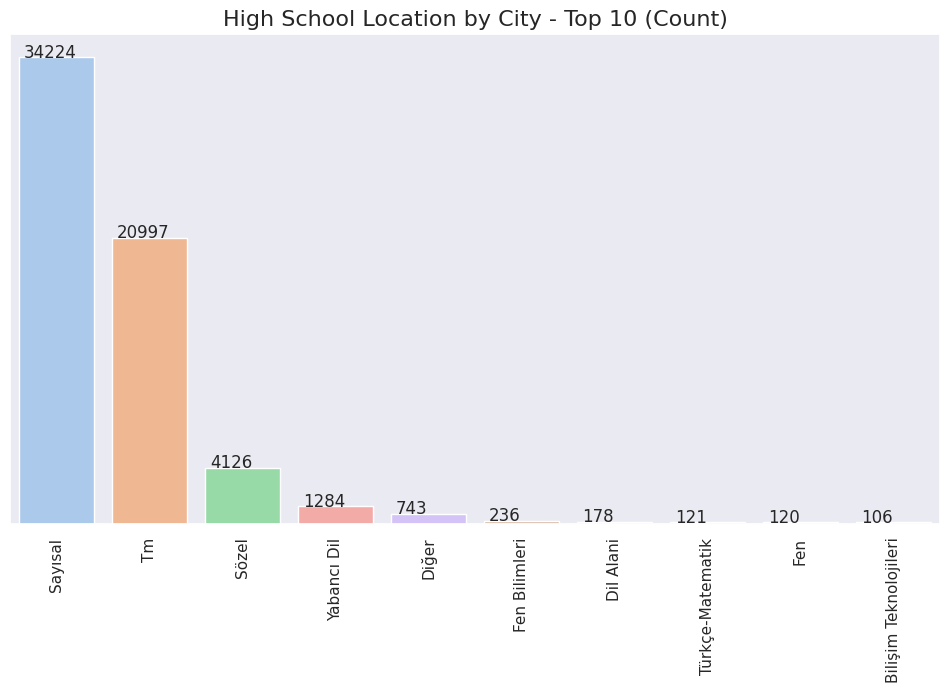

In [82]:
plt.subplots(figsize=(12,14))

plt.subplot(211)
plt.title('High School Location by City - Top 10 (Count)', fontsize=16)
new_df=[]

ax = sns.countplot(x=train['Lise Bolumu'], palette='pastel', alpha=1, order=train['Lise Bolumu'].value_counts().head(10).index)

for p in ax.patches:
        
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

👉 The most preferred high school department is Science (Sayısal). Turkish-Mathematics (TM) and Social Sciences (Sözel) follow, while the least preferred departments are those in vocational and technical fields.

#### 3.2.13.4 Grade for High School

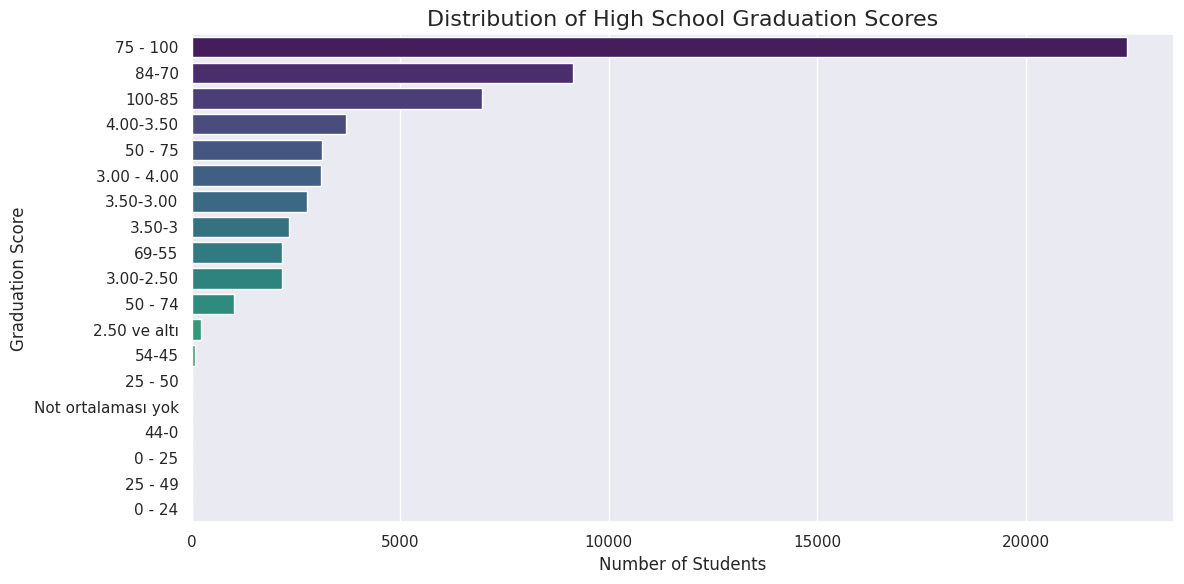

In [83]:
# Count the occurrences of each category in the 'Lise Mezuniyet Notu' column
score_counts = train['Lise Mezuniyet Notu'].value_counts()

# Create the barplot for the graduation scores
plt.figure(figsize=(12, 6))
sns.barplot(x=score_counts.values, y=score_counts.index, palette='viridis')

# Add titles and labels
plt.title('Distribution of High School Graduation Scores', fontsize=16)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Graduation Score', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



👉 Our data contains both GPA values and scores ranging from 0 to 100. Therefore, we will evaluate and comment on both criteria. First, the highest number of scores falls within the 75-100 range, followed by the 70-84 range. These ranges generally indicate a good academic performance. Looking at the GPA values, we see that most of the students have a GPA between 3.00 and 3.50. This suggests that, on average, students have a successful academic standing.

###  3.2.13 Type of High School

👉 In Turkey, there are 6 different types of high schools. These are Private, Regular, İmam Hatip,Anatolian, Vocational, and Science high schools. First, we will correct any spelling errors in the data, and then we will visualize it.

In [84]:
category_mapping = {
    'Özel Lisesi': 'Özel Lise',
    'Özel lisesi': 'Özel Lise',
    'Özel':'Özel Lise',
    'Düz Lise': 'Düz lise',
    'Devlet': 'Düz lise',
    'Fen lisesi': 'Fen Lisesi',
    'Meslek Lisesi': 'Meslek Lisesi',
    'Meslek': 'Meslek Lisesi',
    'Anadolu Lisesi': 'Anadolu Lisesi',
    'Lise Turu Anadolu Lisesi': 'Anadolu Lisesi'
    # Add more mappings as needed
}
train['Lise Turu'] = train['Lise Turu'].replace(category_mapping)
test['Lise Turu'] = test['Lise Turu'].replace(category_mapping)

In [85]:
train['Lise Turu'].value_counts()

Lise Turu
Anadolu Lisesi       13262
Diğer                13184
Düz lise             13160
Özel Lise             7016
Anadolu lisesi        6998
Meslek lisesi         3666
Meslek Lisesi         2864
Fen Lisesi            2784
İmam Hatip Lisesi     1158
Name: count, dtype: int64

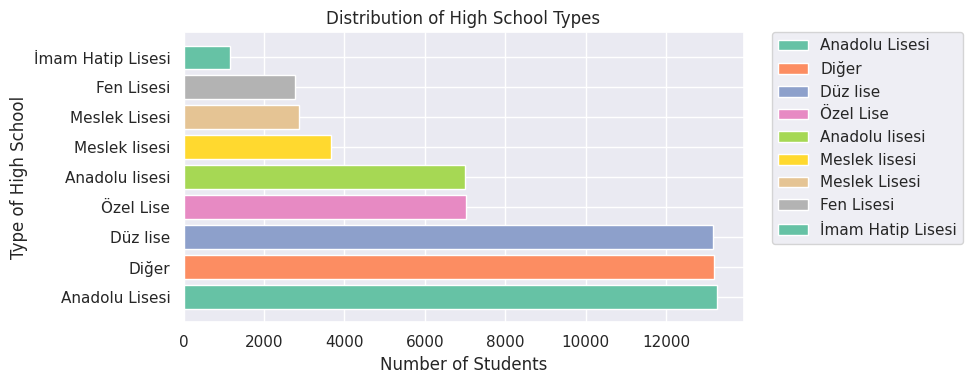

In [86]:
# Count occurrences of each type of high school
counts = train['Lise Turu'].value_counts()

# Set the color palette
colors = sns.color_palette("Set2", n_colors=len(counts))

# Plotting
plt.figure(figsize=(10, 4))

# Plot a horizontal bar chart with different colors for each bar
bars = plt.barh(counts.index, counts.values, color=colors)

# Set the title and labels
plt.title('Distribution of High School Types')
plt.xlabel('Number of Students')
plt.ylabel('Type of High School')

# Adjust legend
plt.legend(bars, counts.index, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


👉 We can say that Anatolian and general high schools have a significantly higher proportion. The lowest proportion is for 'İmam Hatip' high schools.

### 3.2.14 Parental Education and Employment Status

#### 3.2.14.1 Mothers' Educational Level

In [87]:
# Create the dictionary for mapping similar categories to standardized names
education_mapping_anne = {
    'DOKTORA': 'Doktora',
    'Doktara': 'Doktora',
    'YÜKSEK LİSANS': 'Yüksek Lisans',
    'Yüksek Lisans / Doktara': 'Yüksek Lisans / Doktora',
    'YÜKSEK LİSANS': 'Yüksek Lisans',
    'ÜNİVERSİTE': 'Üniversite',
    'İLKOKUL MEZUNU': 'İlkokul Mezunu',
    'İlkokul': 'İlkokul Mezunu',
    'LİSE': 'Lise',
    'Lise Mezunu': 'Lise',
    'ORTAOKUL MEZUNU': 'Ortaokul Mezunu',
    'Ortaokul': 'Ortaokul Mezunu',
    'Eğitim Yok': 'Eğitimi Yok',  # Fix casing inconsistency
    'Eğitimi yok': 'Eğitimi Yok',
    'Eği̇Ti̇M Yok':'Eğitimi Yok',
    'Eği̇ti̇m Yok':'Eğitimi Yok',
    'Üniversite': 'Üniversite Mezunu',
}

# Optional: Strip leading/trailing spaces and ensure consistent capitalization
train['Anne Egitim Durumu'] = train['Anne Egitim Durumu'].str.strip().str.title()
test['Anne Egitim Durumu'] = test['Anne Egitim Durumu'].str.strip().str.title()
# Apply the mapping to the 'Anne Egitim Durumu' column
train['Anne Egitim Durumu'] = train['Anne Egitim Durumu'].replace(education_mapping_anne)
test['Anne Egitim Durumu'] = test['Anne Egitim Durumu'].replace(education_mapping_anne)


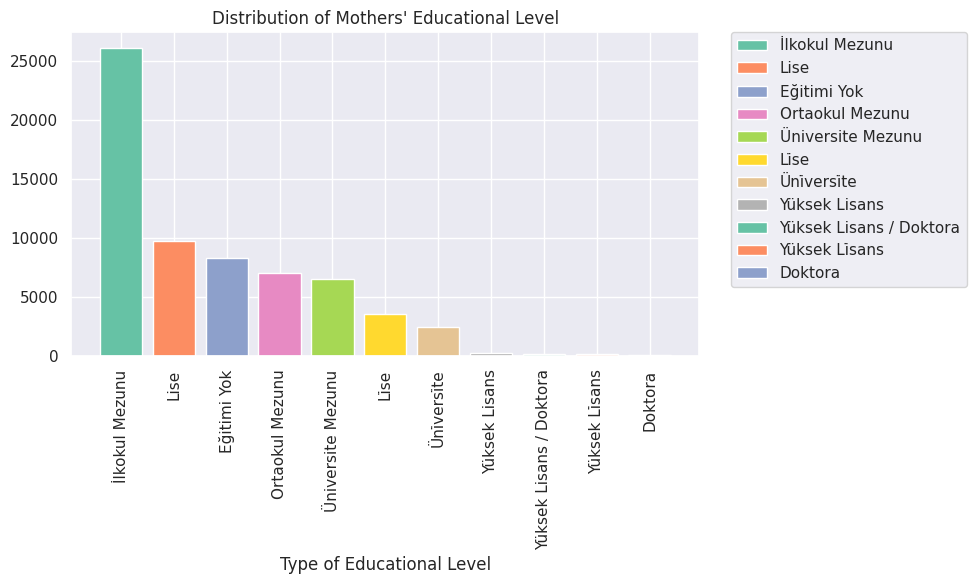

In [88]:
# Count occurrences of each type of high school
counts = train['Anne Egitim Durumu'].value_counts()

# Set the color palette
colors = sns.color_palette("Set2", n_colors=len(counts))

# Plotting
plt.figure(figsize=(10, 6))  # Increased height to accommodate rotated labels

# Plot a vertical bar chart with different colors for each bar
bars = plt.bar(counts.index, counts.values, color=colors)

# Set the title and labels
plt.title("Distribution of Mothers' Educational Level")
plt.xlabel('Type of Educational Level')


# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust legend
plt.legend(bars, counts.index, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


👉 When examining the mothers' education levels, we see that the most common categories are primary school, high school, and no education. We observe that the proportion of these categories decreases as the education level increases.

#### 3.2.14.2 Fathers' Educational Level

In [89]:
# Create the dictionary for mapping similar categories to standardized names
education_mapping_baba = {
    'DOKTORA': 'Doktora',
    'Doktara': 'Doktora',
    'YÜKSEK LİSANS': 'Yüksek Lisans',
    'Yüksek Lisans / Doktara': 'Yüksek Lisans / Doktora',
    'YÜKSEK LİSANS': 'Yüksek Lisans',
    'ÜNİVERSİTE': 'Üniversite',
    'İLKOKUL MEZUNU': 'İlkokul Mezunu',
    'İlkokul': 'İlkokul Mezunu',
    'LİSE': 'Lise',
    'Lise Mezunu': 'Lise',
    'ORTAOKUL MEZUNU': 'Ortaokul Mezunu',
    'Ortaokul': 'Ortaokul Mezunu',
    'Eğitim Yok': 'Eğitimi Yok',  # Fix casing inconsistency
    'Eğitimi yok': 'Eğitimi Yok',
    'Eği̇Ti̇M Yok':'Eğitimi Yok',
    'Eği̇ti̇m Yok':'Eğitimi Yok',
    'Üniversite': 'Üniversite Mezunu',
    '0':'Eğitimi Yok',
}

# Apply the mapping to the 'Anne Egitim Durumu' column
train['Baba Egitim Durumu'] = train['Baba Egitim Durumu'].replace(education_mapping_baba)
test['Baba Egitim Durumu'] = test['Baba Egitim Durumu'].replace(education_mapping_baba)

# Optional: Strip leading/trailing spaces and ensure consistent capitalization
train['Baba Egitim Durumu'] = train['Baba Egitim Durumu'].str.strip().str.title()
test['Baba Egitim Durumu'] = test['Baba Egitim Durumu'].str.strip().str.title()

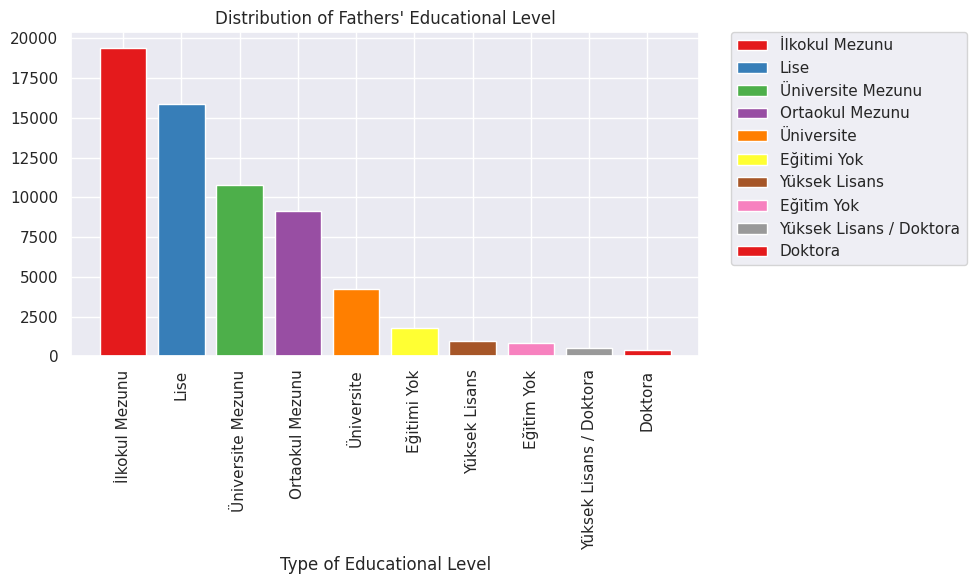

In [90]:
# Count occurrences of each type of high school
counts = train['Baba Egitim Durumu'].value_counts()

# Set the color palette
colors = sns.color_palette("Set1", n_colors=len(counts))

# Plotting
plt.figure(figsize=(10, 6))  # Increased height to accommodate rotated labels

# Plot a vertical bar chart with different colors for each bar
bars = plt.bar(counts.index, counts.values, color=colors)

# Set the title and labels
plt.title("Distribution of Fathers' Educational Level")
plt.xlabel('Type of Educational Level')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust legend
plt.legend(bars, counts.index, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


👉 Similar to mothers' education levels, the highest education level among fathers is also primary school. However, compared to the mothers' education levels, fathers have a higher proportion of high school and university graduates. We can confidently say that education levels are higher compared to the mothers'.

### 3.2.14.3 Parent Sector

In [91]:
# Define the replacement dictionary
replacement_dict = {
    'ÖZEL SEKTÖR': 'Özel Sektör',
    'KAMU': 'Kamu',
    'DİĞER': 'Diğer',
    '-': 'Bilinmiyor',
    '0': 'Bilinmiyor'
}

# Apply replacements to both train and test DataFrames
for column in ['Baba Sektor', 'Anne Sektor']:
    train[column] = train[column].replace(replacement_dict)
    test[column] = test[column].replace(replacement_dict)


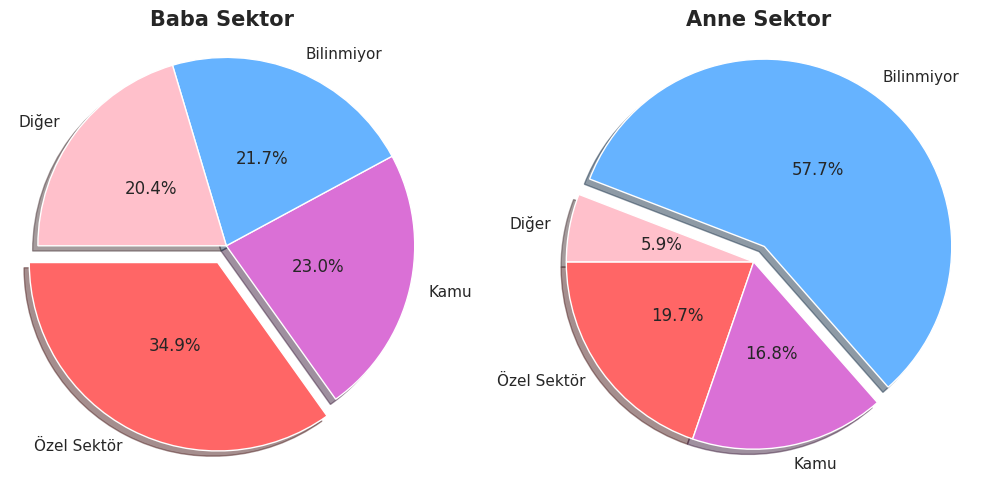

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size to accommodate both charts side by side

labels = ['Özel Sektör', 'Kamu', 'Bilinmiyor', 'Diğer']
colors = ['#ff6666', 'orchid', '#66b3ff', 'pink']
explode = [0.1, 0, 0, 0]# Explode one of the slices for emphasis
explode_1 = [0, 0, 0.1, 0] 

# Pie chart for Baba Sektor
values_baba = [
    train[train["Baba Sektor"] == 'Özel Sektör']["Baba Sektor"].count(),
    train[train["Baba Sektor"] == 'Kamu']["Baba Sektor"].count(),
    train[train["Baba Sektor"] == 'Bilinmiyor']["Baba Sektor"].count(),
    train[train["Baba Sektor"] == 'Diğer']["Baba Sektor"].count()
]

# Pie chart for Anne Sektor
values_anne = [
    train[train["Anne Sektor"] == 'Özel Sektör']["Anne Sektor"].count(),
    train[train["Anne Sektor"] == 'Kamu']["Anne Sektor"].count(),
    train[train["Anne Sektor"] == 'Bilinmiyor']["Anne Sektor"].count(),
    train[train["Anne Sektor"] == 'Diğer']["Anne Sektor"].count()
]

# Subplot for Baba Sektor
plt.subplot(1, 2, 1)
plt.pie(values_baba, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=180, pctdistance=0.5)
plt.title('Baba Sektor', fontsize=15, fontweight='bold')
plt.axis('equal')

# Subplot for Anne Sektor
plt.subplot(1, 2, 2)
plt.pie(values_anne, labels=labels, colors=colors, explode=explode_1, autopct='%1.1f%%', shadow=True, startangle=180, pctdistance=0.5)
plt.title('Anne Sektor', fontsize=15, fontweight='bold')
plt.axis('equal')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


👉 There are 4 different sectors in the data: private, public, other, and unknown (those who do not wish to respond). When we look at the industry in which the father works, the pie chart on the left shows that the private sector leads with a rate of 34.9%. In the case of the mother's sector, we can evaluate that 57.7% is unknown or left blank. Apart from that, we can say that the sector in which the mother works is the private sector.

### 3.2.14.4 Parent Employment Status

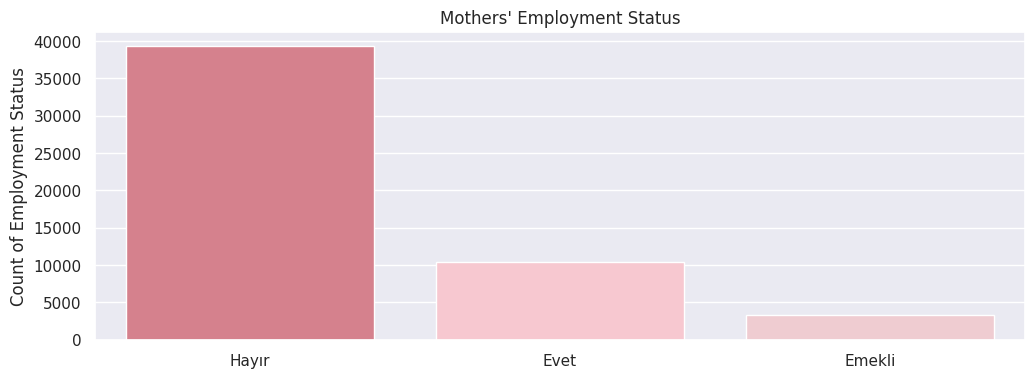

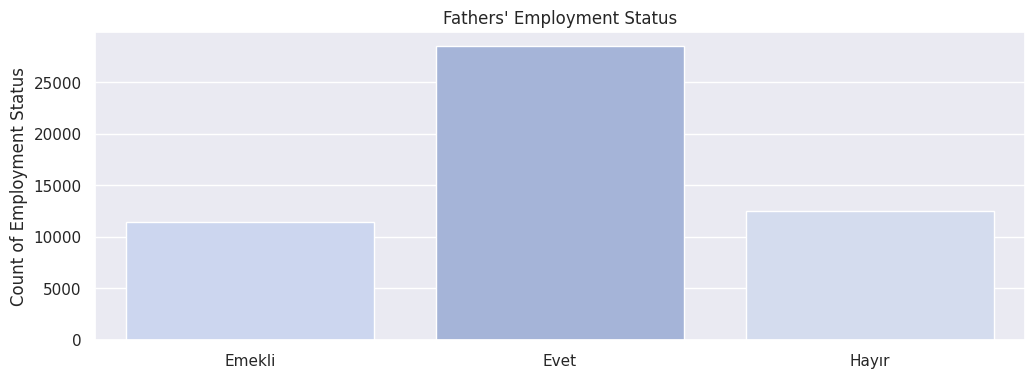

In [93]:

plt.figure(figsize=(12,4))
colors_mother=['#E37383','#FFC0CB','#f5c6cd']
colors_father=['#c6d4f5','#9db1e0','#d0daf2']
plot = sns.countplot(x="Anne Calisma Durumu", data=train, palette=colors_mother).set_title("Mothers' Employment Status")
plt.xlabel("")
plt.ylabel("Count of Employment Status")

plt.figure(figsize=(12,4))

plot = sns.countplot(x="Baba Calisma Durumu", data=train, palette=colors_father).set_title("Fathers' Employment Status")
plt.xlabel("")
plt.ylabel("Count of Employment Status")

plt.show()

👉 When we look at mothers' employment status, we generally see the response "No", indicating that they are not working. The majority of fathers are employed. While there is a small difference between the number of retired and unemployed fathers, this difference is significantly larger among mothers.

### 3.2.15 Which NGO are you a member of?

👉 There are many charitable organizations in Turkey, including Kızılay, AFAD, TEMA, LÖSEV, AÇEV, ÇYDD, and others. These organizations serve various purposes and missions, with the primary aim of reaching communities and providing benefits to society. In our data, we aim to determine how many individuals have benefited from these organizations. First, we will clean the data and then take a closer look at these organizations.

In [94]:
# Replace '-' with 'Bilinmiyor'
train['Hangi STK\'nin Uyesisiniz?'] = train['Hangi STK\'nin Uyesisiniz?'].replace('-', 'Bilinmiyor')
test['Hangi STK\'nin Uyesisiniz?'] = test['Hangi STK\'nin Uyesisiniz?'].replace('-', 'Bilinmiyor')

# Standardize specific organization names
standardize_map = {
    'Lösev': 'LÖSEV',
    'Tema': 'TEMA'
}

train.loc[train['Hangi STK\'nin Uyesisiniz?'].str.contains('afad', case=False, na=False),'Hangi STK\'nin Uyesisiniz?']='AFAD'

train['Hangi STK\'nin Uyesisiniz?'] = train['Hangi STK\'nin Uyesisiniz?'].replace(standardize_map)
test['Hangi STK\'nin Uyesisiniz?'] = test['Hangi STK\'nin Uyesisiniz?'].replace(standardize_map)

# Count occurrences in both train and test datasets
unique_counts_train = train['Hangi STK\'nin Uyesisiniz?'].value_counts()
unique_counts_test = test['Hangi STK\'nin Uyesisiniz?'].value_counts()

# Define the threshold
threshold = 100

# Identify values to replace with 'Diğer'
values_to_replace_train = unique_counts_train[unique_counts_train < threshold].index
values_to_replace_test = unique_counts_test[unique_counts_test < threshold].index

# Replace values below the threshold with 'Diğer'
train['Hangi STK\'nin Uyesisiniz?'] = train['Hangi STK\'nin Uyesisiniz?'].replace(values_to_replace_train, 'Diğer')
test['Hangi STK\'nin Uyesisiniz?'] = test['Hangi STK\'nin Uyesisiniz?'].replace(values_to_replace_test, 'Diğer')


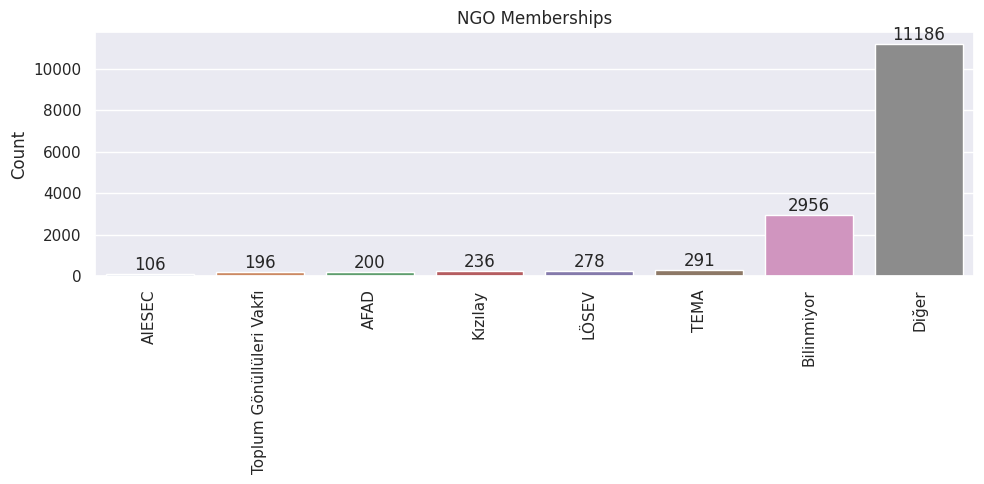

In [95]:
plt.figure(figsize=(10, 5))

# Get the counts of each unique STK membership, sort them, and select the bottom 10
gdpp_bottom10 = train["Hangi STK'nin Uyesisiniz?"].value_counts(ascending=True).head(10)

# Create a bar plot for the bottom 10
ax = sns.barplot(x=gdpp_bottom10.index, y=gdpp_bottom10.values)

# Annotate each bar with the height (count)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Set labels
ax.set(xlabel='', ylabel='Count')
plt.xticks(rotation=90)
plt.title('NGO Memberships')

plt.tight_layout()
plt.show()


👉 We can observe from the graph that the most frequently joined organizations differ from the more popular institutions. This is quite normal since the "Other" category encompasses all organizations. Additionally, 2,956 people are not members of any organization. It is worth noting that TEMA, LÖSEV, and KIZILAY are the most preferred organizations.

### 3.2.16 Number of Siblings

In [96]:
train['Kardes Sayisi']=train['Kardes Sayisi'].replace('Kardeş Sayısı 1 Ek Bilgi Aile Hk. Anne Vefat',1)
train['Kardes Sayisi'] = pd.to_numeric(train['Kardes Sayisi'], errors='coerce')
test['Kardes Sayisi'] = pd.to_numeric(test['Kardes Sayisi'], errors='coerce')

# Replace NaN values if necessary, for example, with 0
train['Kardes Sayisi'] = train['Kardes Sayisi'].fillna(0)

# Convert to integers
train['Kardes Sayisi'] = train['Kardes Sayisi'].astype(int)

test['Kardes Sayisi'] = test['Kardes Sayisi'].fillna(0)
test['Kardes Sayisi'] = test['Kardes Sayisi'].astype(int)


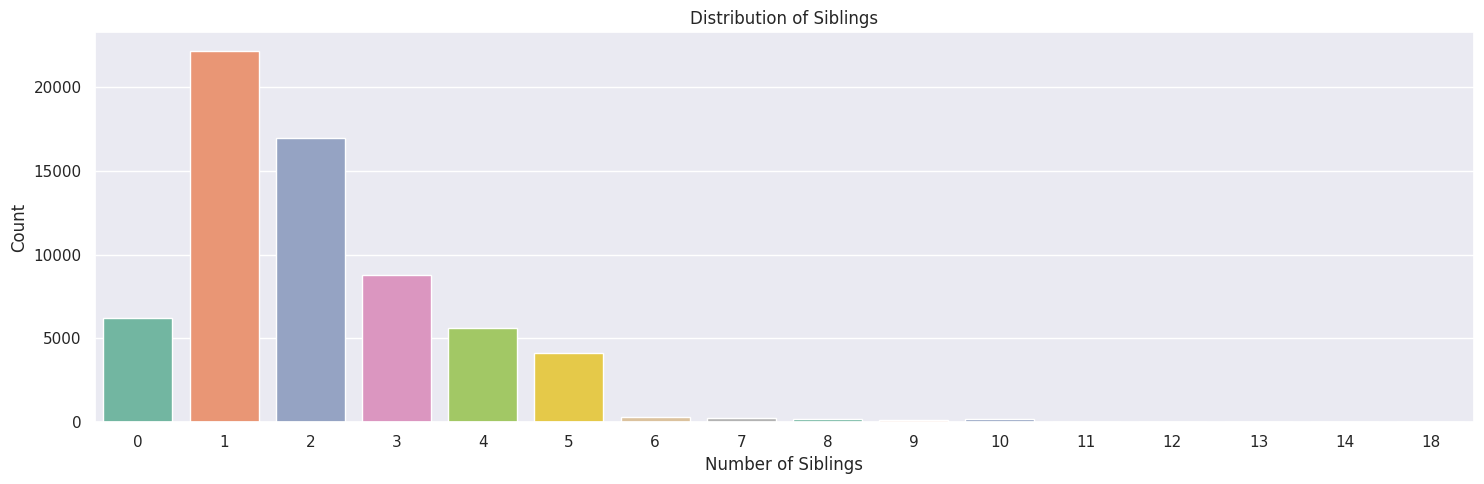

In [97]:
# Count occurrences of each number of siblings
sibling_counts = train['Kardes Sayisi'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=sibling_counts.index, y=sibling_counts.values, palette="Set2")

# Set the title and labels
plt.title('Distribution of Siblings')
plt.xlabel('Number of Siblings')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=360)

# Show plot
plt.tight_layout()
plt.show()


👉 The most common number of siblings is 1 and 2. Individuals with 3 or 4 siblings and those with no siblings follow this trend in the graph. As the number of siblings increases, the proportion of individuals with that number of siblings decreases.

### 3.2.17 Entrepreneurial Involvement and Club Membership

#### 3.2.17.1 Are you a member of an entrepreneurship-type club?

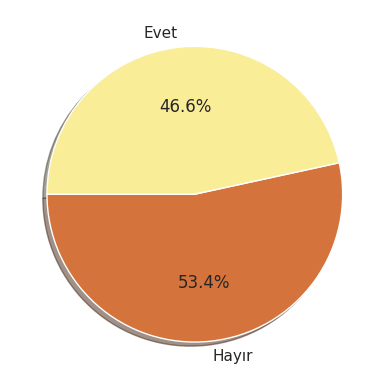

In [98]:
labels_pie = ["Hayır","Evet"]
values = train['Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['#d4733b', '#faed98']
ax1.pie(values, labels=labels_pie, autopct='%1.1f%%',shadow=True,startangle=180,colors=colors)
plt.show()

👉 In the pie chart, we can see that 53.4% of participants are not members of any entrepreneurship club.

#### 3.2.17.2 What is the name of the club of which you are a member?

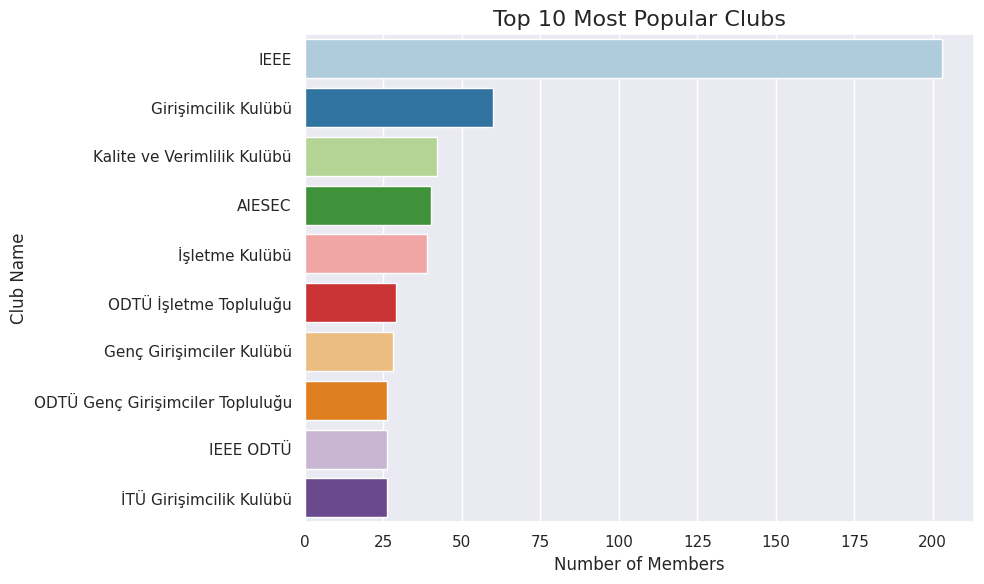

In [99]:
# Get the top 10 club names
top_10_clubs = train['Uye Oldugunuz Kulubun Ismi'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_clubs.values, y=top_10_clubs.index, palette='Paired')

# Add title and labels
plt.title('Top 10 Most Popular Clubs', fontsize=16)
plt.xlabel('Number of Members', fontsize=12)
plt.ylabel('Club Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


👉 The most popular club by a wide margin is IEEE. Following it are the Entrepreneurship and Quality and Efficiency clubs.

#### 3.2.17.3 Experience Related to Entrepreneurship

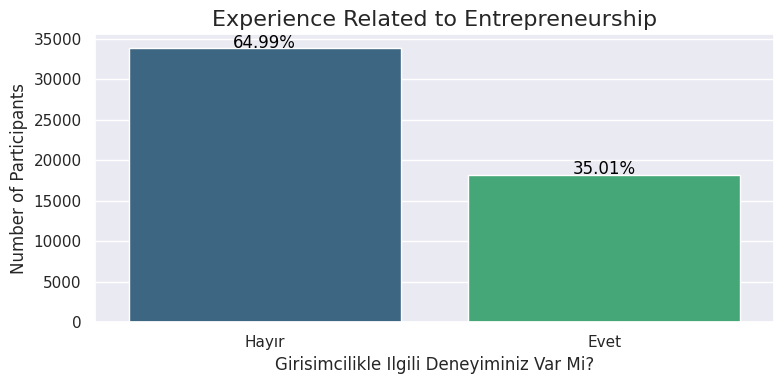

In [100]:

# Count the occurrences of each response
experience_counts = train['Girisimcilikle Ilgili Deneyiminiz Var Mi?'].value_counts()

# Calculate percentages
total_counts = experience_counts.sum()
percentages = (experience_counts / total_counts) * 100

# Create a barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=experience_counts.index, y=experience_counts.values, palette='viridis')

# Add percentage labels on top of the bars
for i, v in enumerate(experience_counts.values):
    ax.text(i, v + 50, f'{percentages[i]:.2f}%', color='black', ha='center')

# Add title and labels
plt.title('Experience Related to Entrepreneurship', fontsize=16)
plt.ylabel('Number of Participants', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



👉 The majority of participants, at a rate of 64.99%, indicated that they had no prior experience in entrepreneurship, while 35.01% reported having experience related to entrepreneurship.

### 3.2.17 Can you explain your experience related to entrepreneurship?

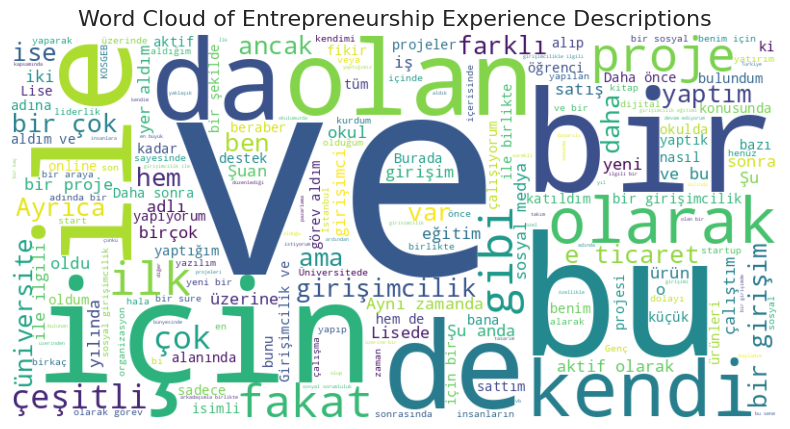

In [101]:
# Assuming 'train' is your DataFrame and the column exists
text_data = train['Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?'].dropna().tolist()

# Join all the text into a single string
text_string = ' '.join(text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Entrepreneurship Experience Descriptions', fontsize=16)
plt.show()


### 3.2.18 English Proficiency and Fluency

#### 3.2.18.1 Do you speak English?

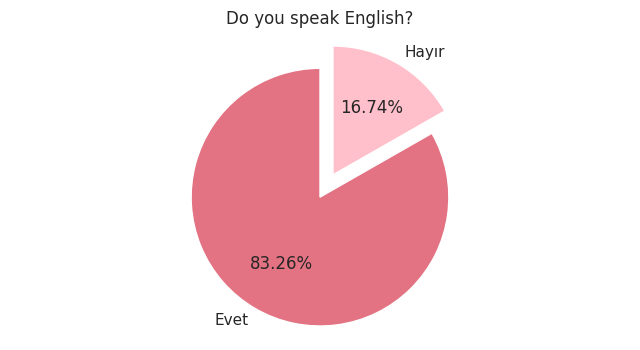

In [102]:
plt.figure(figsize=(8, 4))
labels=['Evet', 'Hayır']
plt.pie(train['Ingilizce Biliyor musunuz?'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Do you speak English?')
plt.axis('equal')
plt.show()

👉 83.26% of the participants know English, while 16.74% indicate that they do not speak English

#### 3.2.18.2 What is your level of English?

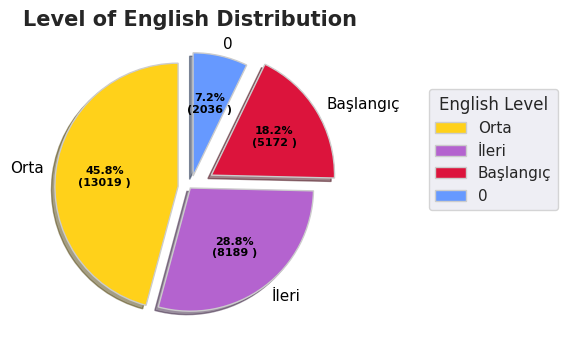

In [103]:
race = ['Orta', 'İleri', 'Başlangıç',  '0'] 
  

data = [13019, 8189, 5173, 2037] 
  
  
# Creating explode data 
explode = ( 0.1, 0,0.2, 0.1) 
  
# Creating color parameters 
colors = (  "#ffd11a", "#b463cf", 
          "#DC143C", "#6699ff", "#ff66b3" ) 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(8, 4)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = race, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="#000000")) 
  
# Adding legend 
ax.legend(wedges, race, 
          title ="English Level", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 0, 1.25)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Level of English Distribution", fontsize=15, fontweight='bold') 
  
# show plot 
plt.show()

👉 As can be seen in the pie chart, the majority of participants stated that they can speak English at an intermediate level, while the percentage of those who can speak English at an advanced and beginner level is 28.8 and 18.2, respectively. The number of those who do not know English at all is 2036, and this rate is 7.2. In general, we can say that the participants can speak English at an intermediate level.


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color:#fcf6de ; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #2c3e50 ;"> 4.</span>  Data Pre-Processing 🦦 </h3>
   
</div>


## 4.1 Removing Null Values 

👉 Removing null values is an essential step in data cleaning to ensure the accuracy and reliability of analysis. Null or missing values can distort results, lead to incorrect conclusions, and affect the performance of machine learning models. We can improve data quality and obtain more meaningful insights by handling or removing these values.

In [104]:
threshold = 0.75

missing_columns = train.columns[train.isnull().mean() > threshold]
train= train.drop(columns=missing_columns)
test = test.drop(columns=missing_columns)

target = 'Degerlendirme Puani'

print('Removing missing columns : ', missing_columns)

Removing missing columns :  Index(['Dogum Tarihi', 'Lise Adi Diger', 'Lise Bolum Diger',
       'Hangi STK'nin Uyesisiniz?',
       'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
       'Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite', 'Age',
       'Dogum Yili', 'Dogum Ayi', 'Dogum Gunu'],
      dtype='object')


## 4.2 Filling Null Values

👉 Filling null values is crucial in preparing data for analysis, especially when missing data can affect model performance. In this case, we used the KNN Imputer to fill the null values, which estimates missing values based on the nearest neighbours in the dataset. This method preserves the data's structure and helps maintain accuracy by considering relationships between features.

In [105]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

def knn_impute(df, n_neighbors=5):
    """
    Fill missing values in a DataFrame using KNN Imputation.

    Parameters:
    df (pd.DataFrame): The input DataFrame with potential missing values.
    n_neighbors (int): The number of neighbors to consider for imputation.

    Returns:
    pd.DataFrame: A DataFrame with missing values filled.
    """

    # Select columns with less than 100% missing values
    non_empty_columns = df.columns[df.isnull().mean() < 1.0]
    df_reduced = df[non_empty_columns].copy()

    # Convert categorical columns to numeric codes
    for col in df_reduced.select_dtypes(include='object').columns:
        df_reduced[col] = df_reduced[col].astype('category').cat.codes

    # Initialize the KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Apply KNN Imputer and create a new DataFrame for the imputed values
    df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_reduced), columns=df_reduced.columns)

    # Restore categorical columns in the imputed DataFrame
    for col in df.select_dtypes(include='object').columns:
        if col in df_reduced.columns:
            # Map the numeric codes back to original categories
            df_imputed[col] = df_imputed[col].round().astype(int).map(
                dict(enumerate(df[col].astype('category').cat.categories))
            )

    # Ensure all original columns are included; fill missing ones with NaN
    for col in df.columns:
        if col not in df_imputed.columns:
            df_imputed[col] = np.nan
    
    # Reorder the DataFrame to match the original column order
    df_imputed = df_imputed[df.columns]
    
    return df_imputed


In [106]:
# Function to impute and print lengths
def impute_and_check_length(df, n_neighbors=5):
    """Impute missing values and print the length of the DataFrame."""
    df_imputed = knn_impute(df, n_neighbors=n_neighbors)
    print(f"Length of DataFrame after imputation: {len(df_imputed)}")
    return df_imputed

# Apply the modified imputation function and check lengths
df_train_imputed = impute_and_check_length(train, n_neighbors=5)
df_test_imputed = impute_and_check_length(test, n_neighbors=5)


Length of DataFrame after imputation: 64939
Length of DataFrame after imputation: 11049


## 4.3 Encoding

👉 Ordinal encoding is a technique used to convert categorical values into numeric format by assigning integers to each category based on their order. This is particularly useful when the categorical variables have a natural ranking, such as 'low', 'medium', and 'high'. In contrast, label encoding is typically applied to target values in classification tasks, where each unique class is assigned a unique integer. Both methods facilitate the integration of categorical data into machine learning algorithms, allowing models to process these values effectively. In our dataset,  we will use ordinal encoding for categorical features and label encoding for the target feature.

In [107]:
# Identify categorical columns excluding the target variable
cat_cols_train = train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'Degerlendirme Puani']
# Apply ordinal encoding to the categorical features
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the training data, then transform the test data
df_train_imputed[cat_cols_train] = ordinal_encoder.fit_transform(df_train_imputed[cat_cols_train].astype(str))
df_test_imputed[cat_cols_train] = ordinal_encoder.transform(df_test_imputed[cat_cols_train].astype(str))


In [108]:
train = df_train_imputed
test = df_test_imputed

In [109]:
le = LabelEncoder()
train['Degerlendirme Puani'] = le.fit_transform(train['Degerlendirme Puani'])

## 4.4 Splitting the Dataset into Features and Target Variable

👉 Before building the model, we need to split our dataset into two parts. The first part should include all features except the target feature ('Degerlendirme Puani'), as this is what we aim to predict. Additionally, we need to adjust the column names, as some machine learning models, such as LightGBM, may not work with the original column names.

In [110]:
# Define features and target variable
X = train.drop(['Degerlendirme Puani'], axis=1)  # Features (independent variables)
y = train["Degerlendirme Puani"]  # Target variable (dependent variable)

In [111]:
def clean_feature_names(df):
    """Replace non-alphanumeric characters in column names with underscores."""
    df.columns = df.columns.str.replace(r'\W+', '_', regex=True)
    return df

# Clean feature names for training and test datasets
X = clean_feature_names(X)
test = clean_feature_names(test)

In [112]:
X_train =X
y_train =y

X_test = test.copy()

In [113]:
X_test=X_test.fillna(0)

In [114]:
X_test.isnull().sum()

Basvuru_Yili                                            0
Cinsiyet                                                0
Dogum_Yeri                                              0
Ikametgah_Sehri                                         0
Universite_Adi                                          0
Universite_Turu                                         0
Burslu_ise_Burs_Yuzdesi                                 0
Burs_Aliyor_mu_                                         0
Bölüm                                                   0
Universite_Kacinci_Sinif                                0
Universite_Not_Ortalamasi                               0
Daha_Once_Baska_Bir_Universiteden_Mezun_Olmus           0
Lise_Adi                                                0
Lise_Sehir                                              0
Lise_Turu                                               0
Lise_Bolumu                                             0
Lise_Mezuniyet_Notu                                     0
Baska_Bir_Kuru


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color:#fcf6de ; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #2c3e50 ;"> 5.</span>  Modelling 👩🏽‍🌾 </h3>
   
</div>


👉 In this section, we define error metrics, modeling techniques, and implement a weighted ensemble method.

### 5.1 Error Metrics 

In [115]:
def root_mean_squared_log_error(y_true, y_pred):
    """Compute Root Mean Squared Logarithmic Error (RMSLE).
    
    RMSLE is used when we want to penalize under-predictions more than over-predictions,
    typically for regression problems where the target values are positive.
    
    Args:
        y_true (tensor): The true target values.
        y_pred (tensor): The predicted target values.
    
    Returns:
        tensor: The RMSLE value between true and predicted values.
    """
    return K.sqrt(K.mean(K.square(K.log(y_pred + 1) - K.log(y_true + 1) + K.epsilon())))

def root_mean_squared_error(y_true, y_pred):
    """Compute Root Mean Squared Error (RMSE).
    
    RMSE is a common regression metric that gives a higher penalty to larger errors,
    and it's useful when the distribution of errors is Gaussian.
    
    Args:
        y_true (tensor): The true target values.
        y_pred (tensor): The predicted target values.
    
    Returns:
        tensor: The RMSE value between true and predicted values.
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r2_error(y_true, y_pred):
    """Compute R-squared (R2) error or the coefficient of determination.
    
    R2 measures how well the predictions approximate the actual data. An R2 of 1 indicates 
    a perfect fit, while an R2 of 0 means the model does not explain any variance.
    
    Args:
        y_true (tensor): The true target values.
        y_pred (tensor): The predicted target values.
    
    Returns:
        tensor: The R-squared value.
    """
    SS_res = K.sum(K.square(y_true - y_pred))  # Residual sum of squares
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))  # Total sum of squares
    return 1 - SS_res / (SS_tot + K.epsilon())  # R-squared formula


## 5.2 Split Data

In [116]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

In [117]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        """Initialize the Splitter class with optional parameters for splitting the data.
        
        Args:
            test_size (float): Proportion of the dataset to include in the validation/test split when not using k-fold. Default is 0.2 (20%).
            kfold (bool): Whether to use KFold cross-validation or a single train-test split. Default is True (use KFold).
            n_splits (int): Number of splits for KFold cross-validation. Default is 5.
        """
        self.test_size = test_size  # The fraction of data to use for validation when not using KFold
        self.kfold = kfold  # Boolean flag to determine if KFold cross-validation is used
        self.n_splits = n_splits  # Number of splits for KFold cross-validation

    def split_data(self, X, y, random_state_list):
        """Split the dataset into training and validation sets using either KFold or a single train-test split.
        
        Args:
            X (pd.DataFrame): Feature matrix.
            y (pd.Series or np.array): Target variable.
            random_state_list (list): List of random seeds for reproducibility across splits.
        
        Yields:
            tuple: Yields a tuple of (X_train, X_val, y_train, y_val) for each split.
        """
        if self.kfold:
            # Use KFold cross-validation if kfold is True
            for random_state in random_state_list:
                # Create a KFold instance with the specified number of splits and random state for reproducibility
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    # Split the dataset into training and validation sets based on the indices provided by KFold
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val  # Yield the split data
        else:
            # Use a single train-test split if kfold is False
            for random_state in random_state_list:
                # Split the dataset into training and validation sets using train_test_split with the given test size and random state
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val  # Yield the split data


## 5.3 Model Selection 

### 5.3.2 Regressor Models

In [118]:
class Regressor:
    """
    This class defines and manages multiple regression models for training and evaluation. It allows for the 
    use of a wide variety of machine learning algorithms, including gradient boosting methods, decision trees, 
    and artificial neural networks (ANNs). The models are initialized with specific hyperparameters, and can 
    be used for ensemble or individual training tasks.
    
    Attributes:
        n_estimators (int): The number of estimators (used for tree-based models).
        device (str): The computation device, such as 'gpu' or 'cpu' for models like XGBoost or LightGBM.
        random_state (int): A seed to ensure reproducibility in models where randomness is involved.
        reg_models (dict): A dictionary storing various regression models and their configurations.
        len_models (int): The number of models in the `reg_models` dictionary.
        
    Methods:
        __init__: Initializes the Regressor class with default or custom parameters and sets up the models.
        _define_reg_model: Defines the various regression models, including tree-based models, boosting models,
                           and neural networks, each with predefined hyperparameters.
    """
    
    def __init__(self, n_estimators=100, device="gpu", random_state=0):
        """
        Initializes the Regressor class with the number of estimators, device (CPU or GPU), 
        and a random state for reproducibility.
        
        Args:
            n_estimators (int): Number of estimators for ensemble methods (default: 100).
            device (str): Device to run the models on, such as 'gpu' or 'cpu'.
            random_state (int): Random seed to ensure reproducibility of results.
        """
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        # Initialize the regression models by calling the method to define them
        self.reg_models = self._define_reg_model()
        # Get the number of models available in the dictionary
        self.len_models = len(self.reg_models)
        
    def _define_reg_model(self):
        """
        Defines and configures various regression models with specific hyperparameters.
        
        The models included are:
        - Gradient Boosting Models (e.g., XGBoost, LightGBM, CatBoost, Histogram-based Gradient Boosting)
        - Tree-based models (e.g., Extra Trees, Decision Trees, Random Forests)
        - Regular linear models (e.g., Linear Regression, Ridge, ElasticNet)
        - Artificial Neural Networks (customized ANN architectures)

        The hyperparameters are pre-tuned for optimal performance based on prior experimentation.
        
        Returns:
            reg_models (dict): A dictionary containing initialized regression models with their corresponding
                               hyperparameters.
        """
        
        # Define hyperparameters for different models

        # Hyperparameters for Histogram-Based Gradient Boosting
        hist_params = {
            'max_iter': 609,
            'learning_rate': 0.07387064266088846,
            'max_leaf_nodes': 93,
            'min_samples_leaf': 21,
            'max_depth': 6,
            'l2_regularization': 0.7564566809906599
        }
        
        # Hyperparameters for LightGBM
        lgbm_params = {
            'n_estimators': 1911,
            'learning_rate': 0.03194493835113891,
            'num_leaves': 80,
            'max_depth': 5,
            'reg_alpha': 0.72476246021494,
            'reg_lambda': 0.3090219914438861,
            'min_child_samples': 43,
            'verbose': -1
        }
         
        # Hyperparameters for XGBoost
        xgb_params = {
            'grow_policy': 'depthwise',
            'n_estimators': 215,
            'learning_rate': 0.16300068555151356,
            'max_depth': 6,
            'lambda': 0.023039154891598364,
            'alpha': 0.054104022967667684,
            'subsample': 0.9285906529295264,
            'colsample_bytree': 0.9992545746522107,
            'min_child_weight': 9,
            'gamma': 0.6019743106495145,
            'tree_method': 'auto',
            'booster': 'dart',
            'sample_type': 'weighted',
            'normalize_type': 'tree',
            'rate_drop': 1.1092720087882864e-06,
            'skip_drop': 0.005317118970201641,
            'verbosity': 0
        }
         
        # Hyperparameters for CatBoost
        cat_params = {
            'iterations': 1886,
            'learning_rate': 0.030030752911586283,
            'depth': 5,
            'l2_leaf_reg': 0.011273335411376949,
            'max_leaves': 49,
            'min_data_in_leaf': 41,
            'bagging_temperature': 3.6178032847258046,
            'border_count': 230,
            'random_strength': 0.7207354655283336,
            'silent': True,
            'grow_policy': 'Lossguide',
        }

        # Dictionary of regression models
        reg_models = {
            # XGBoost model
            #'xgb_reg': xgb.XGBRegressor(**xgb_params),
            'xgb_reg': xgb.XGBRegressor(verbosity=0),
            # LightGBM model
            'lgb_reg': lgb.LGBMRegressor(**lgbm_params),
            # 'lgb_reg': lgb.LGBMRegressor(verbose= -1),
            # Histogram-based Gradient Boosting model
           # 'hgbm': HistGradientBoostingRegressor(**hist_params),
            'hgbm': HistGradientBoostingRegressor(),
            'hgbm_alt': HistGradientBoostingRegressor(max_iter=476, loss="squared_error", n_iter_no_change=300, random_state=self.random_state),
            # CatBoost model
            #'cat_reg': CatBoostRegressor(**cat_params),
            'cat_reg': CatBoostRegressor(silent=True),
            # Tree-based models
            'etr': ExtraTreesRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(random_state=self.random_state),
            'RandomForestRegressor': RandomForestRegressor(),
            'dt': DecisionTreeRegressor(),
            # Linear models
            'lr': LinearRegression(),
            'adr': ARDRegression(),
            'ridge': RidgeCV(),
            'el_net': ElasticNetCV(),
            # Other models
            'knn': KNeighborsRegressor(),
            'PassiveAggressiveRegressor': PassiveAggressiveRegressor(random_state=self.random_state),
            'HuberRegressor': HuberRegressor(),
         
        }

        return reg_models


### 5.3.3. Weighted Ensemble

In [119]:
class OptunaWeights:
    def __init__(self, random_state):
        self.study = None
        self.weights = None
        self.random_state = random_state

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", -1, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the RMSE score for the weighted prediction
        score = r2_score(y_true,weighted_pred)
        return score

    def fit(self, y_true, y_preds, n_trials=2000):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds, n_trials=2000):
        self.fit(y_true, y_preds, n_trials=n_trials)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

## 5.4 Modeling

In [120]:
# Encoding functions for target variable
y_uni = y_train.unique()
y_map = dict(zip(y_uni, np.arange(0, len(y_uni))))
y_map_inverse = dict(zip(np.arange(0, len(y_uni)), y_uni))

def encode(y_input):
    return [y_map[f] for f in y_input]

def decode(y_input):
    return [y_map_inverse[f] for f in y_input]

# Splitter setup (k-fold cross-validation)
kfold = True
n_splits = 5
random_state = 42
random_state_list = [42]  # Most common random seeds
splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize predictions array and tracking variables
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
seed_scores = []
trained_models = dict(zip(Regressor().reg_models.keys(), [[] for _ in range(Regressor().len_models)]))

# Evaluate on validation data and store predictions on test data
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits  # m corresponds to the index of random_state in random_state_list
    current_seed = random_state_list[m]  # Get the current random state

    # Print current fold and random seed
    print(f'\n================== FOLD-{n} SEED-{current_seed} ==================\n')

    # Get a set of Regressor models
    reg = Regressor(n_estimators=9999, device='cpu', random_state=current_seed)
    models = reg.reg_models

    # Initialize lists to store out-of-fold (OOF) and test predictions for each base model
    oof_preds = []
    test_preds = []

    # Loop over each base model and fit it to the training data
    for name, model in models.items():
        try:
            if ('cat' in name) or ('lgb' in name) or ('xgb' in name):
                if 'lgb' in name and 'reg' in name:
                    model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)])  # Handle categorical features if needed
                else:
                    model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=600, verbose=False)
            elif 'ann' in name:
                print('here_1')
                model.fit(X_train_, y_train_, validation_data=(X_val, y_val), batch_size=5, epochs=5, verbose=False)
            else:
                model.fit(X_train_, y_train_)

            if  name in 'ann':
        
                y_val_pred = np.array(model.predict(X_val))[:, 0]
                print(y_val_pred)
                test_pred = np.array(model.predict(X_test))[:, 0]
              
            else:
                y_val_pred = np.array(model.predict(X_val))
                test_pred = np.array(model.predict(X_test))

            # Calculate RMSE score
           
            score = root_mean_squared_error(y_val, y_val_pred)
            print(f'{name} [FOLD-{n} SEED-{current_seed}] RMSE: {score:.5f}')

            oof_preds.append(y_val_pred)
            test_preds.append(test_pred)

            # Save the model if it's part of the trained models dictionary
            if name in trained_models.keys():
                trained_models[f'{name}'].append(deepcopy(model))

        except Exception as e:
            print(f"Error with model {name}: {str(e)}")
            continue

    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=current_seed)
    try:
        y_val_pred = optweights.fit_predict(y_val.values, oof_preds)

        score = root_mean_squared_error(y_val, y_val_pred)
        print(f'Ensemble [FOLD-{n} SEED-{current_seed}] RMSE: ----------> {score:.5f}')

        # Append the score and the seed to track it
        seed_scores.append((current_seed, score))
        ensemble_score.append(score)
        weights.append(optweights.weights)
        test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))

    except Exception as e:
        print(f"Error with Optuna ensemble: {str(e)}")
        continue

    gc.collect()




================== FOLD-0 SEED-42 ==================

xgb_reg [FOLD-0 SEED-42] RMSE: 5.26120
lgb_reg [FOLD-0 SEED-42] RMSE: 5.13588
hgbm [FOLD-0 SEED-42] RMSE: 5.31975
hgbm_alt [FOLD-0 SEED-42] RMSE: 5.16984
cat_reg [FOLD-0 SEED-42] RMSE: 5.08252
etr [FOLD-0 SEED-42] RMSE: 5.45415
GradientBoostingRegressor [FOLD-0 SEED-42] RMSE: 6.04613
RandomForestRegressor [FOLD-0 SEED-42] RMSE: 5.40325
dt [FOLD-0 SEED-42] RMSE: 7.50014
lr [FOLD-0 SEED-42] RMSE: 10.49088
adr [FOLD-0 SEED-42] RMSE: 10.56746
ridge [FOLD-0 SEED-42] RMSE: 10.49093
el_net [FOLD-0 SEED-42] RMSE: 16.64847
knn [FOLD-0 SEED-42] RMSE: 13.65626
PassiveAggressiveRegressor [FOLD-0 SEED-42] RMSE: 20.45061
HuberRegressor [FOLD-0 SEED-42] RMSE: 16.79727
Ensemble [FOLD-0 SEED-42] RMSE: ----------> 5.03914

================== FOLD-1 SEED-42 ==================

xgb_reg [FOLD-1 SEED-42] RMSE: 5.26307
lgb_reg [FOLD-1 SEED-42] RMSE: 5.12693
hgbm [FOLD-1 SEED-42] RMSE: 5.36131
hgbm_alt [FOLD-1 SEED-42] RMSE: 5.18791
cat_reg [FOLD-1 SEED-4

In [121]:
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble RMSE score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name} {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble RMSE score 5.04070 ± 0.00947
--- Model Weights ---
xgb_reg -0.14133 ± 0.04208
lgb_reg -0.66433 ± 0.19707
hgbm 0.35044 ± 0.08760
hgbm_alt -0.45000 ± 0.04740
cat_reg -0.98899 ± 0.00798
etr -0.11476 ± 0.08830
GradientBoostingRegressor 0.11095 ± 0.02498
RandomForestRegressor -0.29004 ± 0.06759
dt -0.00694 ± 0.02357
lr 0.11404 ± 0.22441
adr -0.02948 ± 0.13180
ridge -0.08320 ± 0.35140
el_net 0.01433 ± 0.01837
knn -0.00660 ± 0.00880
PassiveAggressiveRegressor -0.00041 ± 0.00252
HuberRegressor -0.01595 ± 0.01767


👉 The best-performing RMSE of 5.03878 indicates the most accurate model performance across multiple trials. The weights reflect the contribution of each model to the ensemble's final prediction. Positive weights suggest a higher influence on the ensemble, while negative values indicate that some models detracted from the overall performance. Models like hgbm and GradientBoostingRegressor had notable positive contributions, whereas models like cat_reg and RandomForestRegressor were assigned negative weights, implying a weaker or even detrimental role in this configuration.

### 5.4.1 Feature Importance Visualization

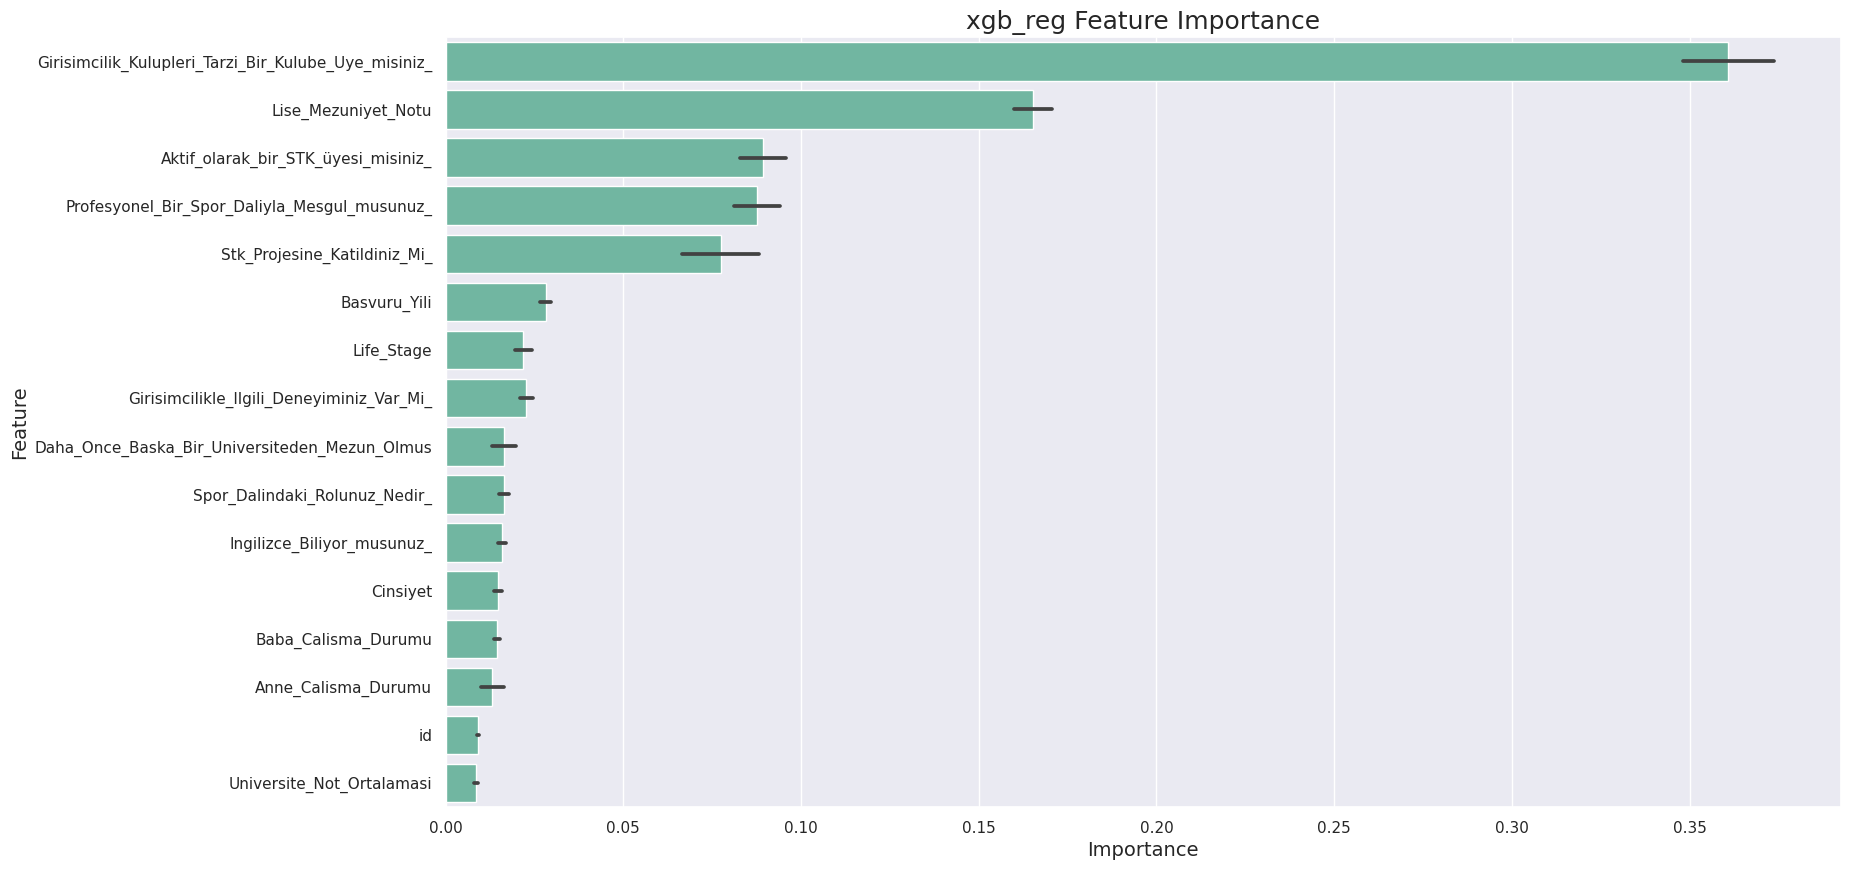

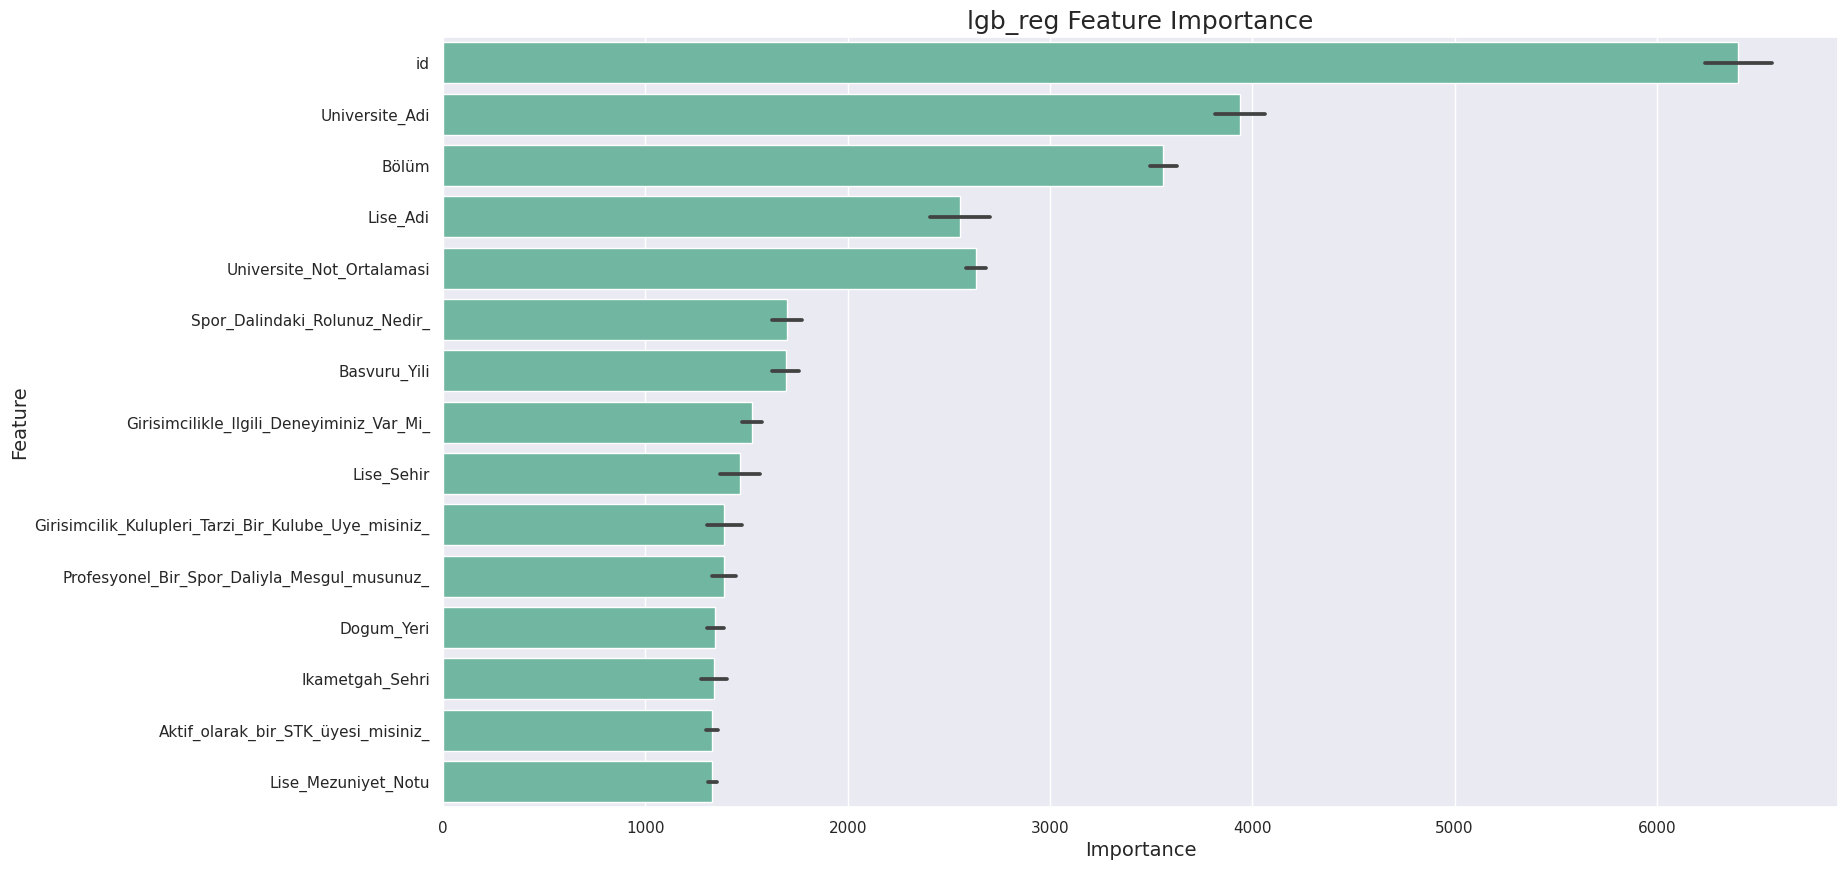

In [122]:
from sklearn.inspection import permutation_importance

def visualize_importance(models, feature_cols, X_val, y_val, title, head=15):
    importances = []
    feature_importance = pd.DataFrame()
    
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        if hasattr(model, "feature_importances_"):
            # For models that have feature_importances_
            _df["importance"] = model.feature_importances_
        else:
            # For models without feature_importances_, use permutation importance
            result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)
            _df["importance"] = result.importances_mean
        
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(head)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # Plot the feature importance
    plt.figure(figsize=(18, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance, color=(0.4, 0.76, 0.65), errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()

# Filter to visualize only 'xgb_reg' and 'lgb_reg'
for name, models in trained_models.items():
    if name in ['xgb_reg', 'lgb_reg'] and len(models) > 0:
        # Make sure you pass validation data (X_val, y_val) for permutation importance
        visualize_importance(models, list(X_train.columns), X_val, y_val, name)


👉 When we examine the feature importance values of the XGBoost model, we can see that the feature `'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?'` (Are you a member of an entrepreneurship club?) has the most significant impact on the model's performance. This suggests that the model heavily relies on this feature to make accurate predictions, indicating its importance in the dataset.

👉 On the other hand, when we look at the feature importance values of the LightGBM (LGBM) model, we can observe that the `id` and `Universite_Adi` (University Name) features contribute the most to the model. These features seem to play a central role in how the LGBM model makes its predictions, highlighting their influence on the overall results. It's also worth noting that the difference in feature importance between models suggests that each algorithm might capture different relationships within the data, which is a valuable insight for model interpretation and feature engineering.


<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color:#fcf6de ; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #2c3e50 ;"> 6.</span>  Submission 🐣 </h3>
   
</div>


In [123]:
sample_submission=pd.read_csv('/kaggle/input/datathon-2024/test_x.csv')
submission = pd.DataFrame({
    'id': sample_submission.id,
    'Degerlendirme Puani': test_predss
})

# Save
submission.to_csv('ensemle_submission.csv', index=False)

print(submission)

          id  Degerlendirme Puani
0          0            45.550287
1          1            33.598868
2          2            25.774064
3          3            36.509216
4          4            48.075622
...      ...                  ...
11044  11044            45.698396
11045  11045            44.025157
11046  11046            51.597196
11047  11047            62.750672
11048  11048            43.725722

[11049 rows x 2 columns]



<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 20px; background-color:#fcf6de ; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.1); text-align: left;">
    <h3 style="color: #2c3e50; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-size: 24px; font-weight: bold; margin-bottom: 10px;"><span style="color: #2c3e50 ;"> 8.</span> Conclusion 🌻 </h3>
   
</div>



👉 In this study, the data was thoroughly analyzed, and patterns were extracted through visualization techniques. Various regression models were applied, and by using weighted ensemble methods, the best result was achieved.

👉 Personal experiences and notes:

We used the models with default parameters on Kaggle due to the long training times. However, you can experiment with hyperparameters locally for potentially better results. The best outcome was achieved through an ensemble of models including XGBoost, LightGBM, CatBoost, HistGradient, Random Forest, and Gradient Boosting, with the best-performing seed being 1234.

Additionally, it's worth noting that the ensemble approach allowed the strengths of different algorithms to complement each other. While individual models performed well, combining their predictions led to improved overall accuracy. You can fine-tune the models further to explore if hyperparameter optimization yields even better results.


If you find this notebook helpful, we would greatly appreciate your support through an upvote. Thank you! ♥